# Predicción de fuga de clientes (churn)


#### AUTORA: Lenuta Morianu
#### Máster Big Data & Data Science 2020-2021
#### Madrid - Febrero 2021

La presente práctica tiene como objetivo final construir un modelo analítico que sea capaz de predecir los potenciales clientes en marcharse (el *churn*) de una empresa de telecomunicaciones. Para cumplir con el objetivo propuesto, se utilizan varios conjuntos de datos (datasets) con información sobre los clientes de la compañía, durante los meses de Diciembre y Enero. 

Los datos que se utilizan para realizar el modelo analítico son los siguientes:

**1.  Dataset CLIENTES**, que incluye los siguientes datos:
    - edad: edad de los clientes
    - facturacion: dinero que pagan los clientes al mes
    - antiguedad: fecha de alta del cliente
    - provincia: lugar de procedencia del cliente
    - num_lineas: número de líneas móviles contratadas
    - num_dt: número de líneas en impago
    - incidencia: es SI,si el cliente ha tenido alguna incidencia/reclamación.
    
**2. Dataset PRODUCTOS**, con los siguientes detalles:
    - conexión: tipo de conexión de internet del cliente
    - vel_conexion: velocidad de conexión de internet
    - TV: tipo de paquete de tv contratado por el cliente.
    
**3. Dataset CONSUMOS**:
    - num_llamad_ent: número de llamadas entrantes de todas sus líneas
    - num_llamad_sal: número de llamadas salientes de todas sus líneas
    - mb_datos: mb de los datos consumidos en todas sus líneas
    - seg_llamad_ent: segundos consumidos en llamadas entrantes
    - seg_llamad_sal: segundos consumidos en llamadas salientes.
    
**4. Dataset FINANCIACION**:
    - financiación: es SI, si el cliente tiene financiado algún terminal
    - imp_financ: el dinero mensual que paga por los terminales financiados
    - descuentos: es SI, si el cliente tiene activo algún descuento (campaña)
    - target: esta variable no la tenemos.
    

### Importar los datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from dateutil.parser import parse    # parsing string in datetime format (without mentioning any string format %m%d%Y...)
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression     #from sklearn.linear_model.logistic
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
import pickle
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import naive_bayes
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from matplotlib import pyplot

#### Clientes

In [2]:
cliente_dic = pd.read_csv('diciembre/clientes_diciembre.csv',
                          delimiter='|')
cliente_dic.head(10)

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia
0,1,63,216.028109,2018-11-23 08:48:00,La Rioja,5,NaN,NaN
1,2,84,255.830842,2017-08-22 03:19:00,Vizcaya,3,NaN,NaN
2,3,66,135.768153,2001-12-27 13:50:00,Albacete,4,NaN,NaN
3,4,69,255.658527,2015-08-08 10:53:00,Lugo,4,NaN,NaN
4,5,30,22.302845,1997-08-29 02:19:00,Tarragona,2,2.0,NaN
5,6,51,99.348645,1997-11-04 11:43:00,Huelva,4,NaN,NaN
6,7,55,88.062883,1996-06-14 01:44:00,Lérida,4,NaN,NaN
7,8,21,73.076377,2004-07-02 12:35:00,La Coruña,4,NaN,NaN
8,9,30,395.481514,2018-03-26 22:22:00,Alicante,3,NaN,NaN
9,10,23,378.134025,2000-02-18 13:23:00,Madrid,5,1.0,NaN


In [3]:
cliente_enero = pd.read_csv('enero/clientes_enero.csv',
                         delimiter='|')
cliente_enero.head(10)

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia
0,1,63,216.028109,11/23/2018 08:48 AM,La Rioja,5,NaN,NaN
1,2,84,255.830842,08/22/2017 03:19 AM,Vizcaya,3,NaN,NaN
2,3,66,135.768153,12/27/2001 01:50 PM,Albacete,4,NaN,NaN
3,4,69,255.658527,08/08/2015 10:53 AM,Lugo,4,NaN,NaN
4,6,51,99.348645,11/04/1997 11:43 AM,Huelva,4,NaN,NaN
5,7,55,88.062883,06/14/1996 01:44 AM,Lérida,4,NaN,NaN
6,8,21,73.076377,07/02/2004 12:35 PM,La Coruña,4,NaN,NaN
7,9,30,395.481514,03/26/2018 10:22 PM,Alicante,3,NaN,NaN
8,11,64,391.692196,09/15/2004 01:49 AM,Córdoba,5,NaN,NaN
9,12,80,199.380443,07/26/2011 01:33 AM,Las Palmas,2,NaN,NaN


#### Consumos

In [4]:
consumo_dic = pd.read_csv('diciembre/consumos_diciembre.csv',
                         delimiter='|')
consumo_dic.head(10)

,id,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal
0,1,110,79,10897,12806,13751
1,2,189,89,18657,6499,10862
2,3,129,30,15511,17013,16743
3,4,51,52,12670,3393,6771
4,5,183,3,23756,18436,4485
5,6,204,51,18428,8956,4764
6,7,217,43,80,16406,19797
7,8,38,73,19850,11503,19279
8,9,5,74,4854,19518,382
9,10,35,89,10188,8889,4748


In [5]:
consumo_enero = pd.read_csv('enero/consumos_enero.csv',
                         delimiter='|')
consumo_enero.head(10)

,id,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal
0,1,95,19,6525,7634,18520
1,2,44,36,14471,14541,8016
2,3,94,27,1428,5248,7106
3,4,186,20,20083,7372,5052
4,6,37,32,19078,5009,8686
5,7,78,96,3032,5118,11695
6,8,183,9,16442,7771,13478
7,9,152,16,17184,10493,11638
8,11,97,43,10961,10288,13798
9,12,187,41,14428,9837,14834


#### Financiación

In [6]:
fin_dic = pd.read_csv('diciembre/financiacion_diciembre.csv',
                         delimiter='|')
fin_dic.head(10)

,id,financiacion,imp_financ,descuentos
0,2,NaN,NaN,SI
1,3,NaN,NaN,SI
2,7,SI,31.553269,NaN
3,11,NaN,NaN,SI
4,12,NaN,NaN,SI
5,15,SI,28.518747,NaN
6,18,NaN,NaN,SI
7,21,NaN,NaN,SI
8,23,SI,27.164033,NaN
9,25,NaN,NaN,SI


In [7]:
fin_enero = pd.read_csv('enero/financiacion_enero.csv',
                         delimiter='|')
fin_enero.head(10)

,id,financiacion,imp_financ,descuentos
0,2,NaN,NaN,SI
1,3,NaN,NaN,SI
2,7,SI,31.553269,NaN
3,11,NaN,NaN,SI
4,12,NaN,NaN,SI
5,15,SI,28.518747,NaN
6,18,NaN,NaN,SI
7,21,NaN,NaN,SI
8,23,SI,27.164033,NaN
9,25,NaN,NaN,SI


#### Productos

In [8]:
prod_dic = pd.read_csv('diciembre/productos_diciembre.csv',
                         delimiter='|')
prod_dic.head(10)

,id,conexion,vel_conexion,TV
0,1,FIBRA,50MB,tv-futbol
1,2,FIBRA,600MB,tv-futbol
2,3,ADSL,35MB,tv-futbol
3,4,FIBRA,200MB,tv-familiar
4,5,ADSL,10MB,tv-futbol
5,6,FIBRA,200MB,tv-futbol
6,7,ADSL,25MB,tv-futbol
7,8,ADSL,30MB,tv-futbol
8,9,ADSL,35MB,tv-total
9,10,ADSL,600MB,tv-total


In [9]:
prod_enero = pd.read_csv('enero/productos_enero.csv',
                         delimiter='|')
prod_enero.head(10)

,id,conexion,vel_conexion,TV
0,1,FIBRA,50MB,tv-futbol
1,2,FIBRA,600MB,tv-futbol
2,3,ADSL,35MB,tv-futbol
3,4,FIBRA,200MB,tv-familiar
4,6,FIBRA,200MB,tv-futbol
5,7,ADSL,25MB,tv-futbol
6,8,ADSL,30MB,tv-futbol
7,9,ADSL,35MB,tv-total
8,11,ADSL,10MB,tv-futbol
9,12,FIBRA,100MB,tv-total


##### Comprobar las dimensiones y los valores únicos de ID cliente - todos los datasets

In [10]:
# Diciembre 

print('\n    DICIEMBRE - Número de observaciones \n')
print('Clientes: ', cliente_dic.shape)
print('Consumos: ', consumo_dic.shape)
print('Productos: ', prod_dic.shape)
print('Financiación: ', fin_dic.shape)

print('\n \n   DICIEMBRE - Valores únicos ID \n')
print('Clientes: ', len(cliente_dic['id'].unique()))
print('Consumos: ', len(consumo_dic['id'].unique()))
print('Productos: ', len(prod_dic['id'].unique()))
print('Financiación: ', len(fin_dic['id'].unique()))


    DICIEMBRE - Número de observaciones 

Clientes:  (95467, 8)
Consumos:  (95467, 6)
Productos:  (95467, 4)
Financiación:  (24198, 4)

 
   DICIEMBRE - Valores únicos ID 

Clientes:  95467
Consumos:  95467
Productos:  95467
Financiación:  24198


In [11]:
# Enero 

print('\n    ENERO - Número de observaciones \n')
print('Clientes: ', cliente_enero.shape)
print('Consumos: ', consumo_enero.shape)
print('Productos: ', prod_enero.shape)
print('Financiación: ', fin_enero.shape)


print('\n \n   ENERO - Valores únicos ID \n')
print('Clientes: ', len(cliente_enero['id'].unique()))
print('Consumos: ', len(consumo_enero['id'].unique()))
print('Productos: ', len(prod_enero['id'].unique()))
print('Financiación: ', len(fin_enero['id'].unique()))


    ENERO - Número de observaciones 

Clientes:  (92711, 8)
Consumos:  (92711, 6)
Productos:  (92711, 4)
Financiación:  (25332, 4)

 
   ENERO - Valores únicos ID 

Clientes:  92711
Consumos:  92711
Productos:  92711
Financiación:  25332


### Construir los dos tablones analíticos: Diciembre y Enero

Al comprobar las dimensiones de los datasets de Diciembre y Enero, así como los valores únicos de la variable ID de cliente, se puede observar que los datasets  *Clientes*, *Consumos* y *Productos* tienen el mismo número de observaciones, lo que significa que se dispone de información sobre el consumo y los productos contratados para todos los clientes que la compañía tiene en su cartera.

Comprobando el dataset de *Financiación* se observa que tiene menos observaciones que el número total de clientes que la compañía tiene en su cartera. En consecuencia, no todos los clientes tienen financiación o descuento.

#### Diciembre


In [12]:
df1_dic = pd.merge(cliente_dic, consumo_dic, on='id')
df2_dic = pd.merge(df1_dic,prod_dic, on='id')
df_dic = pd.merge(df2_dic, fin_dic, on='id', how='left')
df_dic.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV,financiacion,imp_financ,descuentos
0,1,63,216.028109,2018-11-23 08:48:00,La Rioja,5,NaN,NaN,110,79,10897,12806,13751,FIBRA,50MB,tv-futbol,NaN,NaN,NaN
1,2,84,255.830842,2017-08-22 03:19:00,Vizcaya,3,NaN,NaN,189,89,18657,6499,10862,FIBRA,600MB,tv-futbol,NaN,NaN,SI
2,3,66,135.768153,2001-12-27 13:50:00,Albacete,4,NaN,NaN,129,30,15511,17013,16743,ADSL,35MB,tv-futbol,NaN,NaN,SI
3,4,69,255.658527,2015-08-08 10:53:00,Lugo,4,NaN,NaN,51,52,12670,3393,6771,FIBRA,200MB,tv-familiar,NaN,NaN,NaN
4,5,30,22.302845,1997-08-29 02:19:00,Tarragona,2,2.0,NaN,183,3,23756,18436,4485,ADSL,10MB,tv-futbol,NaN,NaN,NaN


#### Enero

In [13]:
df1_enero = pd.merge(cliente_enero, consumo_enero, on='id')
df2_enero = pd.merge(df1_enero,prod_enero, on='id')
df_enero = pd.merge(df2_enero, fin_enero, on='id', how='left')
df_enero.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV,financiacion,imp_financ,descuentos
0,1,63,216.028109,11/23/2018 08:48 AM,La Rioja,5,NaN,NaN,95,19,6525,7634,18520,FIBRA,50MB,tv-futbol,NaN,NaN,NaN
1,2,84,255.830842,08/22/2017 03:19 AM,Vizcaya,3,NaN,NaN,44,36,14471,14541,8016,FIBRA,600MB,tv-futbol,NaN,NaN,SI
2,3,66,135.768153,12/27/2001 01:50 PM,Albacete,4,NaN,NaN,94,27,1428,5248,7106,ADSL,35MB,tv-futbol,NaN,NaN,SI
3,4,69,255.658527,08/08/2015 10:53 AM,Lugo,4,NaN,NaN,186,20,20083,7372,5052,FIBRA,200MB,tv-familiar,NaN,NaN,NaN
4,6,51,99.348645,11/04/1997 11:43 AM,Huelva,4,NaN,NaN,37,32,19078,5009,8686,FIBRA,200MB,tv-futbol,NaN,NaN,NaN


### Obtener la variable target - la información de los clientes que se han ido de la compañía 

Los clientes que se han ido de la compañía son los que están en el dataset de diciembre, pero no en el de enero. Usando el campo ID, se comprueban los clientes de diciembre que siguien en enero como clientes. Los clientes de diciembre que ya no tienen información en el dataset de enero, son los que han dejado la compañía - la variable target.

In [14]:
df_dic['churn'] = (df_dic['id'].isin(df_enero['id'])==False).astype(int)
df_dic.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV,financiacion,imp_financ,descuentos,churn
0,1,63,216.028109,2018-11-23 08:48:00,La Rioja,5,NaN,NaN,110,79,10897,12806,13751,FIBRA,50MB,tv-futbol,NaN,NaN,NaN,0
1,2,84,255.830842,2017-08-22 03:19:00,Vizcaya,3,NaN,NaN,189,89,18657,6499,10862,FIBRA,600MB,tv-futbol,NaN,NaN,SI,0
2,3,66,135.768153,2001-12-27 13:50:00,Albacete,4,NaN,NaN,129,30,15511,17013,16743,ADSL,35MB,tv-futbol,NaN,NaN,SI,0
3,4,69,255.658527,2015-08-08 10:53:00,Lugo,4,NaN,NaN,51,52,12670,3393,6771,FIBRA,200MB,tv-familiar,NaN,NaN,NaN,0
4,5,30,22.302845,1997-08-29 02:19:00,Tarragona,2,2.0,NaN,183,3,23756,18436,4485,ADSL,10MB,tv-futbol,NaN,NaN,NaN,1


In [15]:
# Número de clientes que han dejado la compañía, que no están en el dataset de enero

print('Número total de clientes que han dejado la compañía: ', df_dic['churn'].sum())
print('Dimensiones dataset diciembre: ', df_dic.shape)

Número total de clientes que han dejado la compañía:  7085
Dimensiones dataset diciembre:  (95467, 20)


### Obtener la información de los clientes de nueva incorporación en el mes de enero - nuevos clientes

Los clientes nuevos son lo que aparecen en el dataset de enero, pero que no están en el dataset de diciembre.

In [16]:
df_enero['cl_nuevo'] = (df_enero['id'].isin(df_dic['id'])==False).astype(int)
df_enero.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV,financiacion,imp_financ,descuentos,cl_nuevo
0,1,63,216.028109,11/23/2018 08:48 AM,La Rioja,5,NaN,NaN,95,19,6525,7634,18520,FIBRA,50MB,tv-futbol,NaN,NaN,NaN,0
1,2,84,255.830842,08/22/2017 03:19 AM,Vizcaya,3,NaN,NaN,44,36,14471,14541,8016,FIBRA,600MB,tv-futbol,NaN,NaN,SI,0
2,3,66,135.768153,12/27/2001 01:50 PM,Albacete,4,NaN,NaN,94,27,1428,5248,7106,ADSL,35MB,tv-futbol,NaN,NaN,SI,0
3,4,69,255.658527,08/08/2015 10:53 AM,Lugo,4,NaN,NaN,186,20,20083,7372,5052,FIBRA,200MB,tv-familiar,NaN,NaN,NaN,0
4,6,51,99.348645,11/04/1997 11:43 AM,Huelva,4,NaN,NaN,37,32,19078,5009,8686,FIBRA,200MB,tv-futbol,NaN,NaN,NaN,0


In [17]:
# Número de clientes de nueva incorporación en el mes de enero, los que no estaban en el dataset de diciembre

print('Número total clientes que han dejado la compañía: ', df_enero['cl_nuevo'].sum())
print('Dimensiones dataset enero: ', df_enero.shape)       

Número total clientes que han dejado la compañía:  4329
Dimensiones dataset enero:  (92711, 20)


##### Guardar la variable target (columna churn) en un dataframe distinto y eliminar la columna del dataframe de dic

In [18]:
dic_y = df_dic.iloc[:,[0,-1]]
dic_y

,id,churn
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
...,...,...
95462,99995,0
95463,99996,0
95464,99997,0
95465,99998,0


In [19]:
len(dic_y['id'].unique())

95467

In [20]:
df_dic.drop('churn', axis=1, inplace=True)
df_dic.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV,financiacion,imp_financ,descuentos
0,1,63,216.028109,2018-11-23 08:48:00,La Rioja,5,NaN,NaN,110,79,10897,12806,13751,FIBRA,50MB,tv-futbol,NaN,NaN,NaN
1,2,84,255.830842,2017-08-22 03:19:00,Vizcaya,3,NaN,NaN,189,89,18657,6499,10862,FIBRA,600MB,tv-futbol,NaN,NaN,SI
2,3,66,135.768153,2001-12-27 13:50:00,Albacete,4,NaN,NaN,129,30,15511,17013,16743,ADSL,35MB,tv-futbol,NaN,NaN,SI
3,4,69,255.658527,2015-08-08 10:53:00,Lugo,4,NaN,NaN,51,52,12670,3393,6771,FIBRA,200MB,tv-familiar,NaN,NaN,NaN
4,5,30,22.302845,1997-08-29 02:19:00,Tarragona,2,2.0,NaN,183,3,23756,18436,4485,ADSL,10MB,tv-futbol,NaN,NaN,NaN


##### Guardar la información de qué clientes son nuevos o no en enero (columna cl_nuevo) en un df distinto

In [21]:
enero_clnuevo = df_enero.iloc[:,[0,-1]]
enero_clnuevo.head()

,id,cl_nuevo
0,1,0
1,2,0
2,3,0
3,4,0
4,6,0


In [22]:
len(enero_clnuevo['id'].unique())

92711

In [23]:
df_enero.drop('cl_nuevo', axis=1, inplace=True)
df_enero.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV,financiacion,imp_financ,descuentos
0,1,63,216.028109,11/23/2018 08:48 AM,La Rioja,5,NaN,NaN,95,19,6525,7634,18520,FIBRA,50MB,tv-futbol,NaN,NaN,NaN
1,2,84,255.830842,08/22/2017 03:19 AM,Vizcaya,3,NaN,NaN,44,36,14471,14541,8016,FIBRA,600MB,tv-futbol,NaN,NaN,SI
2,3,66,135.768153,12/27/2001 01:50 PM,Albacete,4,NaN,NaN,94,27,1428,5248,7106,ADSL,35MB,tv-futbol,NaN,NaN,SI
3,4,69,255.658527,08/08/2015 10:53 AM,Lugo,4,NaN,NaN,186,20,20083,7372,5052,FIBRA,200MB,tv-familiar,NaN,NaN,NaN
4,6,51,99.348645,11/04/1997 11:43 AM,Huelva,4,NaN,NaN,37,32,19078,5009,8686,FIBRA,200MB,tv-futbol,NaN,NaN,NaN


### Juntar el dataset de Diciembre y Enero para realizar el pre-procesado de datos

Para realizar el pre-procesado de datos del conjunto de Diciembre y Enero, se crea una nueva columna en cada dataset que indique el mes al que pertenece la observación.


In [24]:
df_dic['mes'] = 'diciembre'
df_enero['mes'] = 'enero'

print('Diciembre - Número de observaciones/clientes: ', df_dic.shape)
print('Enero - Número de observaciones/clientes: ', df_enero.shape)

Diciembre - Número de observaciones/clientes:  (95467, 20)
Enero - Número de observaciones/clientes:  (92711, 20)


In [25]:
df_total = pd.concat([df_dic,df_enero])
df_total.reset_index(drop=True, inplace=True)
df_total.tail()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV,financiacion,imp_financ,descuentos,mes
188173,99996,36,215.890326,04/09/2013 01:33 PM,Guadalajara,3,NaN,NaN,217,96,9059,7735,8823,ADSL,30MB,tv-futbol,NaN,NaN,NaN,enero
188174,99997,68,285.890750,08/08/2003 11:57 PM,Asturias,5,NaN,NaN,168,99,9303,4798,3996,FIBRA,200MB,tv-futbol,SI,14.616422,NaN,enero
188175,99998,20,383.167610,03/27/2013 08:07 PM,Álava,4,NaN,NaN,188,71,19018,1237,16720,ADSL,20MB,tv-futbol,NaN,NaN,NaN,enero
188176,99999,53,53.301395,01/18/2020 02:30 AM,Sevilla,2,NaN,NaN,138,40,20264,10552,17637,FIBRA,50MB,tv-futbol,NaN,NaN,NaN,enero
188177,100000,18,57.158927,10/22/2009 07:17 PM,Las Palmas,4,NaN,NaN,217,65,21772,14141,927,ADSL,25MB,tv-familiar,NaN,NaN,SI,enero


### Pre-procesado de datos inicial

In [26]:
df_total.shape    # 188.178 número de observaciones de los meses Diciembre y Enero

(188178, 20)

In [27]:
df_total.describe()

,id,edad,facturacion,num_lineas,num_dt,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,imp_financ
count,188178.000000,188178.000000,188178.000000,188178.000000,7343.000000,188178.000000,188178.000000,188178.000000,188178.000000,188178.000000,13038.000000
mean,49995.915575,50.592227,207.440105,3.559731,2.515729,124.960580,49.942060,12499.843850,9964.973217,9979.341969,22.270750
std,28868.075573,19.728833,111.291972,1.090756,1.122437,72.457194,29.163648,7228.701809,5779.620186,5803.444024,10.169251
min,1.000000,18.000000,15.000439,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.009999
25%,24980.000000,33.000000,111.370882,3.000000,2.000000,62.000000,25.000000,6205.000000,4956.000000,4959.000000,13.444882
50%,49985.000000,50.000000,206.927616,4.000000,3.000000,125.000000,50.000000,12496.000000,9959.000000,9980.000000,21.883685
75%,75005.750000,68.000000,304.388724,4.000000,4.000000,188.000000,75.000000,18764.000000,14965.000000,14998.000000,31.134052
max,100000.000000,85.000000,399.998433,39.000000,4.000000,250.000000,100.000000,25000.000000,20000.000000,20000.000000,39.991954



**OBSERVACIONES:**
- facturación - mínimo 15€ - muy baja 
- num_lineas - máximo de 39 líneas - el 75% de clientes tienen hasta 4 líneas
- num_dt - solo 7.343 (aprox. 4%) tienen líneas en impago
- num_llamad_ent - mínimo 0 
- num_llamad_sal - mínimo 0
- mb_datos - mínimo 0
- imp_financ - mínimo 5€

### Análisis de nulos (NaN) - datos faltantes

In [28]:
df_total.isnull().sum()

id                     0
edad                   0
facturacion            0
antiguedad             0
provincia              0
num_lineas             0
num_dt            180835
incidencia        182613
num_llamad_ent         0
num_llamad_sal         0
mb_datos               0
seg_llamad_ent         0
seg_llamad_sal         0
conexion               2
vel_conexion           6
TV                     0
financiacion      175140
imp_financ        175140
descuentos        148986
mes                    0
dtype: int64

In [29]:
round(df_total.isnull().mean(),2)    # Aprox. 97% de los clientes no han tenido incidencias/reclamaciones
                                     # Aprox. 96% de los clientes no han tenido líneas en impago

id                0.00
edad              0.00
facturacion       0.00
antiguedad        0.00
provincia         0.00
num_lineas        0.00
num_dt            0.96
incidencia        0.97
num_llamad_ent    0.00
num_llamad_sal    0.00
mb_datos          0.00
seg_llamad_ent    0.00
seg_llamad_sal    0.00
conexion          0.00
vel_conexion      0.00
TV                0.00
financiacion      0.93
imp_financ        0.93
descuentos        0.79
mes               0.00
dtype: float64

##### Rellenar las variables *num_dt* e *incidencia*

Los registros que no tiene información en las columnas *num_dt* e *incidencia* (con valores *NaN* o datos faltantes), son
los clientes que no han tenido líneas en impago e incidencias/ reclamaciones. 
En consecuencia, se rellenan los valores NaN en estas columnas con cero.


In [30]:
# Num_dt

df_total['num_dt'].isnull().sum()

180835

In [31]:
df_total['num_dt'].value_counts()

4.0    1891
3.0    1822
1.0    1817
2.0    1813
Name: num_dt, dtype: int64

In [32]:
df_total['num_dt'] = df_total['num_dt'].fillna(0)
df_total['num_dt'].value_counts()

0.0    180835
4.0      1891
3.0      1822
1.0      1817
2.0      1813
Name: num_dt, dtype: int64

In [33]:
df_total['num_dt'].isnull().sum()

0

In [34]:
# Incidencia

df_total['incidencia'].isnull().sum()

182613

In [35]:
df_total['incidencia'].value_counts()

SI    5565
Name: incidencia, dtype: int64

In [36]:
df_total['incidencia'] = df_total['incidencia'].fillna('NO')
df_total['incidencia'].value_counts()

NO    182613
SI      5565
Name: incidencia, dtype: int64

In [37]:
df_total['incidencia'].isnull().sum()

0

##### Rellenar las variables *conexión* y *vel_conexion*

In [38]:
# Conexión

df_total['conexion'].isnull().sum()

2

In [39]:
df_total['conexion'].value_counts()

ADSL     95220
FIBRA    92956
Name: conexion, dtype: int64

In [40]:
conexion_nan = df_total[df_total['conexion'].isna()]
conexion_nan

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV,financiacion,imp_financ,descuentos,mes
95524,63,28,183.353127,10/27/2018 10:37 PM,Palencia,5,0.0,NO,80,26,16659,3649,14213,NaN,100MB,tv-familiar,NaN,NaN,SI,enero
95525,65,85,369.220953,09/23/2002 11:09 AM,Álava,3,0.0,NO,152,74,304,17449,12919,NaN,30MB,tv-total,NaN,NaN,NaN,enero


In [41]:
df_total[df_total.id.isin([63,65])]

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV,financiacion,imp_financ,descuentos,mes
61,63,28,183.353127,2018-10-27 22:37:00,Palencia,5,0.0,NO,224,52,9156,15571,2680,FIBRA,100MB,tv-familiar,NaN,NaN,SI,diciembre
63,65,85,369.220953,2002-09-23 11:09:00,Álava,3,0.0,NO,144,39,17096,6901,9538,ADSL,30MB,tv-total,NaN,NaN,NaN,diciembre
95524,63,28,183.353127,10/27/2018 10:37 PM,Palencia,5,0.0,NO,80,26,16659,3649,14213,NaN,100MB,tv-familiar,NaN,NaN,SI,enero
95525,65,85,369.220953,09/23/2002 11:09 AM,Álava,3,0.0,NO,152,74,304,17449,12919,NaN,30MB,tv-total,NaN,NaN,NaN,enero


Para el cliente con id=63 se observa que el tipo de conexión en diciembre ha sido FIBRA, por lo tanto, se rellena el tipo de conexión a FIBRA para el mes de enero.

Para el cliente con id=65 se observa que el tipo de conexión en diciembre ha sido ADSL, por lo tanto, se opta rellenar el tipo de conexión a ADSL para el mes de enero.

In [42]:
df_total['conexion'] = df_total.apply(lambda x:'FIBRA' if (pd.isna(x['conexion']) and x['id']==63) 
                                      else ('ADSL' if (pd.isna(x['conexion']) and x['id']==65)
                                            else x['conexion']), axis=1)

In [43]:
df_total['conexion'].value_counts()

ADSL     95221
FIBRA    92957
Name: conexion, dtype: int64

In [44]:
df_total['conexion'].isnull().sum()

0

In [45]:
# Vel_conexión

df_total['vel_conexion'].isnull().sum()

6

In [46]:
df_total['vel_conexion'].value_counts()

200MB    19017
600MB    18921
300MB    18672
50MB     18641
100MB    18431
20MB     15995
25MB     15952
10MB     15776
30MB     15709
35MB     15619
15MB     15436
16598        1
?            1
1            1
Name: vel_conexion, dtype: int64

In [47]:
df_total[df_total['vel_conexion'].isna()]

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV,financiacion,imp_financ,descuentos,mes
56983,59665,64,258.698493,2009-04-28 07:51:00,Palencia,3,0.0,NO,192,30,938,16230,8443,FIBRA,NaN,tv-familiar,NaN,NaN,NaN,diciembre
56984,59666,77,258.276588,2014-01-10 13:36:00,Castellón,3,0.0,NO,234,1,14798,11515,13342,ADSL,NaN,tv-familiar,NaN,NaN,NaN,diciembre
56985,59667,20,295.106696,2013-06-23 12:53:00,Soria,3,0.0,NO,28,94,15396,12113,5958,FIBRA,NaN,tv-futbol,NaN,NaN,SI,diciembre
95667,215,54,126.570011,04/03/2003 12:47 AM,Cantabria,5,0.0,NO,114,94,21443,12555,4524,ADSL,NaN,tv-futbol,NaN,NaN,NaN,enero
95668,216,60,179.288551,10/01/1995 10:34 AM,Málaga,3,0.0,NO,212,74,16951,10913,619,ADSL,NaN,tv-futbol,NaN,NaN,SI,enero
95669,217,52,187.078300,12/09/2010 02:19 PM,Almería,3,0.0,NO,35,20,1146,12066,19098,FIBRA,NaN,tv-familiar,NaN,NaN,SI,enero


In [48]:
# Lista con todos los IDs que tienen vel_conexion Nan o valor incorrecto (?, 1 ,16598)

ids_velconex_nan = list(df_total.loc[((df_total['vel_conexion'].isnull()) | (df_total['vel_conexion']=='?') | 
                                     (df_total['vel_conexion']=='1') | (df_total['vel_conexion']=='16598')),'id'])
ids_velconex_nan

[13, 59665, 59666, 59667, 73779, 73889, 215, 216, 217]

In [49]:
# Df con solo las observaciones que tienen vel_conexion Nan o valor incorrecto (?, 1 ,16598)

cl_vel_conex_null = df_total[df_total.id.isin(ids_velconex_nan)==True]
cl_vel_conex_null

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV,financiacion,imp_financ,descuentos,mes
12,13,55,209.365550,2019-08-15 23:13:00,Huelva,3,0.0,NO,118,13,18030,16766,13801,FIBRA,16598,tv-familiar,NaN,NaN,NaN,diciembre
212,215,54,126.570011,2003-04-03 00:47:00,Cantabria,5,0.0,NO,26,0,23430,12809,0,ADSL,35MB,tv-futbol,NaN,NaN,NaN,diciembre
213,216,60,179.288551,1995-10-01 10:34:00,Málaga,3,0.0,NO,116,90,6902,17662,6290,ADSL,35MB,tv-futbol,NaN,NaN,SI,diciembre
214,217,52,187.078300,2010-12-09 14:19:00,Almería,3,0.0,NO,123,29,7259,8574,19855,FIBRA,600MB,tv-familiar,NaN,NaN,SI,diciembre
56983,59665,64,258.698493,2009-04-28 07:51:00,Palencia,3,0.0,NO,192,30,938,16230,8443,FIBRA,NaN,tv-familiar,NaN,NaN,NaN,diciembre
56984,59666,77,258.276588,2014-01-10 13:36:00,Castellón,3,0.0,NO,234,1,14798,11515,13342,ADSL,NaN,tv-familiar,NaN,NaN,NaN,diciembre
56985,59667,20,295.106696,2013-06-23 12:53:00,Soria,3,0.0,NO,28,94,15396,12113,5958,FIBRA,NaN,tv-futbol,NaN,NaN,SI,diciembre
70426,73779,26,209.565464,1999-09-04 01:31:00,Pontevedra,5,1.0,NO,82,29,9667,7184,2677,ADSL,1,tv-futbol,NaN,NaN,NaN,diciembre
70528,73889,69,118.515385,2003-04-10 19:50:00,Castellón,2,0.0,NO,74,99,12169,19080,2068,FIBRA,?,tv-familiar,NaN,NaN,NaN,diciembre
95477,13,55,209.365550,08/15/2019 11:13 PM,Huelva,3,0.0,NO,67,84,17947,12162,4918,FIBRA,200MB,tv-familiar,NaN,NaN,NaN,enero



Se observa que para la mayoría de clientes que no tienen el valor de vel_conexion o que tiene valor pero en un formato incorrecto, la información de vel_conexion que falta es solo de un mes en concreto (dic o enero), pero que existe la información en el siguiente o anterior mes (enero o diciembre). Por lo tanto, se rellenan los NaN de vel_conexion con los mismos valores de vel_conexion que cada cliente tuvo en Enero o Diciembre. 

El único cliente que no tiene la información de vel_conexión en ambos meses es el cliente con id = 73779, que se estudiará a continuación.

In [50]:
df_total['vel_conexion'] = df_total.apply(
    lambda x:'200MB' if (x['id']==73889 or x['id']==13) 
    else ('35MB' if (x['id']==215 or x['id']==216)
          else ('600MB' if (x['id']==217 or x['id']==59665)
                else ('10MB' if (x['id']==59666)
                      else ('300MB' if (x['id']==59667)
                            else x['vel_conexion'])))),axis=1)

In [51]:
df_total['vel_conexion'].value_counts()

200MB    19019
600MB    18923
300MB    18673
50MB     18641
100MB    18431
20MB     15995
25MB     15952
10MB     15777
30MB     15709
35MB     15621
15MB     15436
1            1
Name: vel_conexion, dtype: int64

In [52]:
vel_conex_1 = df_total[df_total['vel_conexion']=='1']
vel_conex_1

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV,financiacion,imp_financ,descuentos,mes
70426,73779,26,209.565464,1999-09-04 01:31:00,Pontevedra,5,1.0,NO,82,29,9667,7184,2677,ADSL,1,tv-futbol,NaN,NaN,NaN,diciembre


In [53]:
vel_conex2 = df_total[df_total['num_lineas']==5]
vel_conex3 = vel_conex2[vel_conex2['conexion'] =='ADSL']
vel_conex4 = vel_conex3[vel_conex3['provincia']=='Pontevedra']
vel_conex5 = vel_conex4[vel_conex4['TV']=='tv-futbol']
vel_conex6  = vel_conex5[vel_conex5['facturacion']>200]
vel_conex6['vel_conexion'].value_counts()                # el tipo de vel_conexion para clientes con 5líneas, con conexion ADSL,
                                                        # de Pontevedra, con el mismo TV y con facturación >200

10MB     35
15MB     35
25MB     34
20MB     34
30MB     23
35MB     18
100MB     2
50MB      2
1         1
300MB     1
Name: vel_conexion, dtype: int64

In [54]:
df_total['vel_conexion'] = df_total.apply(      # se imputa con la vel_conexion más común para entre los clientes con las
    lambda x:'10MB' if (x['id']==73779)         # misma características de contrato (num_lineas, etc.), 
    else x['vel_conexion'],axis=1) 

In [55]:
df_total['vel_conexion'].value_counts()

200MB    19019
600MB    18923
300MB    18673
50MB     18641
100MB    18431
20MB     15995
25MB     15952
10MB     15778
30MB     15709
35MB     15621
15MB     15436
Name: vel_conexion, dtype: int64

In [56]:
df_total['vel_conexion'].isnull().sum()

0

##### Rellenar las variables *Financiación*, *Importe financiación* y *Descuento*

In [57]:
# Clientes sin financiación y sin descuento

df1 = (df_total[df_total['financiacion'].isnull()]).isin(df_total[df_total['descuentos'].isnull()])
df1['id'].sum()  

138648

In [58]:
# Clientes que tienen financiación y descuento al mismo tiempo

df3 = (df_total[df_total['financiacion'].notnull()]).isin(df_total[df_total['descuentos'].notnull()])
df3['id'].sum()

2700

In [59]:
df_total['financiacion'].isna().sum()

175140

In [60]:
df_total['financiacion'].value_counts()

SI    13038
Name: financiacion, dtype: int64

In [61]:
df_total['imp_financ'].isna().sum()

175140

In [62]:
df_total['imp_financ'].value_counts()

39.243454    2
5.828388     2
27.645342    2
30.768017    2
38.707231    2
            ..
20.289651    1
20.511540    1
35.743315    1
24.093385    1
29.234553    1
Name: imp_financ, Length: 6737, dtype: int64

In [63]:
df_total['descuentos'].isna().sum()

148986

In [64]:
df_total['descuentos'].value_counts()

SI    39192
Name: descuentos, dtype: int64

__________
Los clientes sin valor (NaN) en el campo *Financiación*, *Importe financiación* y *Descuentos* son los que no tienen financiación o descuento. En consecuencia, se reemplazan los valores NaN con NO en caso de *Financiación* y *Descuentos*, y con cero en caso de *Importe Financiación*.

In [65]:
df_total['financiacion'] = df_total['financiacion'].fillna('NO')
df_total['imp_financ'] = df_total['imp_financ'].fillna(0)
df_total['descuentos'] = df_total['descuentos'].fillna('NO')

In [66]:
df_total['financiacion'].value_counts()

NO    175140
SI     13038
Name: financiacion, dtype: int64

In [67]:
df_total['imp_financ'].value_counts()

0.000000     175140
11.201773         2
24.168124         2
27.645342         2
30.768017         2
              ...  
38.413568         1
29.944703         1
35.743315         1
20.511540         1
37.559554         1
Name: imp_financ, Length: 6738, dtype: int64

In [68]:
df_total['descuentos'].value_counts()

NO    148986
SI     39192
Name: descuentos, dtype: int64

In [69]:
df_total['financiacion'].isna().sum()

0

In [70]:
df_total['imp_financ'].isna().sum()

0

In [71]:
df_total['descuentos'].isna().sum()

0

In [72]:
df_total.isnull().sum()

id                0
edad              0
facturacion       0
antiguedad        0
provincia         0
num_lineas        0
num_dt            0
incidencia        0
num_llamad_ent    0
num_llamad_sal    0
mb_datos          0
seg_llamad_ent    0
seg_llamad_sal    0
conexion          0
vel_conexion      0
TV                0
financiacion      0
imp_financ        0
descuentos        0
mes               0
dtype: int64

### Verificar columnas con valores únicos

In [73]:
for col in df_total.columns:
    print(col)
    print(df_total[col].value_counts())

id
2047     2
74121    2
65933    2
70031    2
98717    2
        ..
46597    1
2741     1
34307    1
17638    1
53451    1
Name: id, Length: 99796, dtype: int64
edad
37    3182
20    3085
27    3055
24    3043
32    3039
      ... 
85    2579
63    2577
59    2570
48    2556
84    2524
Name: edad, Length: 68, dtype: int64
facturacion
186.768467    2
212.550311    2
110.982573    2
255.895305    2
28.829109     2
             ..
223.627041    1
81.314799     1
191.275576    1
282.942802    1
15.117666     1
Name: facturacion, Length: 99796, dtype: int64
antiguedad
01/14/2020 05:08 PM    3
01/19/2020 04:57 PM    3
01/25/2020 12:51 PM    3
01/07/2020 03:55 PM    3
01/07/2020 10:37 PM    3
                      ..
2002-11-28 07:08:00    1
10/13/2017 03:50 PM    1
2007-04-22 13:35:00    1
12/19/2019 06:31 PM    1
1998-11-30 20:17:00    1
Name: antiguedad, Length: 187408, dtype: int64
provincia
Zaragoza                  3918
Navarra                   3916
Valencia                  3913
Astu

### Valores no numéricos

In [74]:
df_total.dtypes

id                  int64
edad                int64
facturacion       float64
antiguedad         object
provincia          object
num_lineas          int64
num_dt            float64
incidencia         object
num_llamad_ent      int64
num_llamad_sal      int64
mb_datos            int64
seg_llamad_ent      int64
seg_llamad_sal      int64
conexion           object
vel_conexion       object
TV                 object
financiacion       object
imp_financ        float64
descuentos         object
mes                object
dtype: object

####  Calcular la antigüedad de los clientes en días

Se observa que la columna *antiguedad* tiene información sobre la fecha de alta de los clientes, en distintos formatos. Se decide calcular la antiguedad en días. Se calcula la antiguedad de los clientes en total días. Para los clientes de Diciembre, la antiguedad se calcula como número de días transcurridos entre la fecha de alta y el último día del mes de diciembre. Para los clientes de Enero, la antiguedad representa el número de días transcurridos entre la fecha de alta y el último día del mes de enero.

In [75]:
df_total['antiguedad'].value_counts()

01/14/2020 05:08 PM    3
01/19/2020 04:57 PM    3
01/25/2020 12:51 PM    3
01/07/2020 03:55 PM    3
01/07/2020 10:37 PM    3
                      ..
2002-11-28 07:08:00    1
10/13/2017 03:50 PM    1
2007-04-22 13:35:00    1
12/19/2019 06:31 PM    1
1998-11-30 20:17:00    1
Name: antiguedad, Length: 187408, dtype: int64

In [76]:
# Renombrar la columna y extrar fecha en formato yyyy-mm-dd

df_total.rename(columns={'antiguedad':'fecha_alta'}, inplace=True)
df_total['fecha_alta'] = df_total['fecha_alta'].apply(lambda x:parse(x))
df_total['fecha_alta'] = df_total['fecha_alta'].apply(lambda x:x.date())   # extraer solo los datos Y-m-d
df_total.head()

,id,edad,facturacion,fecha_alta,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV,financiacion,imp_financ,descuentos,mes
0,1,63,216.028109,2018-11-23,La Rioja,5,0.0,NO,110,79,10897,12806,13751,FIBRA,50MB,tv-futbol,NO,0.0,NO,diciembre
1,2,84,255.830842,2017-08-22,Vizcaya,3,0.0,NO,189,89,18657,6499,10862,FIBRA,600MB,tv-futbol,NO,0.0,SI,diciembre
2,3,66,135.768153,2001-12-27,Albacete,4,0.0,NO,129,30,15511,17013,16743,ADSL,35MB,tv-futbol,NO,0.0,SI,diciembre
3,4,69,255.658527,2015-08-08,Lugo,4,0.0,NO,51,52,12670,3393,6771,FIBRA,200MB,tv-familiar,NO,0.0,NO,diciembre
4,5,30,22.302845,1997-08-29,Tarragona,2,2.0,NO,183,3,23756,18436,4485,ADSL,10MB,tv-futbol,NO,0.0,NO,diciembre


In [77]:
df_total.insert(4, 'antiguedad_dias', df_total.apply(
    lambda x:datetime.date(2020,12,31)-x['fecha_alta'] if (x['mes']=='diciembre') 
    else (datetime.date(2021,1,31)-x['fecha_alta']),axis=1))

df_total['antiguedad_dias'] = df_total['antiguedad_dias'].dt.days.astype(int)  # transformar los días en integer
df_total.head()

,id,edad,facturacion,fecha_alta,antiguedad_dias,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,...,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV,financiacion,imp_financ,descuentos,mes
0,1,63,216.028109,2018-11-23,769,La Rioja,5,0.0,NO,110,...,10897,12806,13751,FIBRA,50MB,tv-futbol,NO,0.0,NO,diciembre
1,2,84,255.830842,2017-08-22,1227,Vizcaya,3,0.0,NO,189,...,18657,6499,10862,FIBRA,600MB,tv-futbol,NO,0.0,SI,diciembre
2,3,66,135.768153,2001-12-27,6944,Albacete,4,0.0,NO,129,...,15511,17013,16743,ADSL,35MB,tv-futbol,NO,0.0,SI,diciembre
3,4,69,255.658527,2015-08-08,1972,Lugo,4,0.0,NO,51,...,12670,3393,6771,FIBRA,200MB,tv-familiar,NO,0.0,NO,diciembre
4,5,30,22.302845,1997-08-29,8525,Tarragona,2,2.0,NO,183,...,23756,18436,4485,ADSL,10MB,tv-futbol,NO,0.0,NO,diciembre


In [78]:
df_total['antiguedad_dias'].value_counts()

392     190
378     175
394     171
390     170
387     170
       ... 
9512      6
9527      5
1314      5
9507      4
9525      4
Name: antiguedad_dias, Length: 9162, dtype: int64

In [79]:
df_total['antiguedad_dias'].isnull().sum()

0

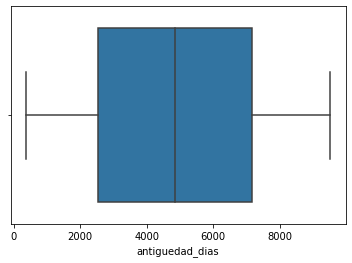

In [80]:
sns.boxplot(x=df_total['antiguedad_dias'])
plt.show()

In [81]:
# El resto de variables categoricas

lista_categoricas = ['provincia','incidencia','conexion','vel_conexion','TV','financiacion','descuentos']

for i in lista_categoricas:
    print(df_total[i].value_counts())

Zaragoza                  3918
Navarra                   3916
Valencia                  3913
Asturias                  3906
Murcia                    3898
Málaga                    3897
Orense                    3849
Alicante                  3849
Córdoba                   3824
Guipúzcoa                 3822
Cáceres                   3813
Burgos                    3805
Huelva                    3802
Sevilla                   3793
Zamora                    3792
Álava                     3791
La Coruña                 3788
Granada                   3788
Santa Cruz de Tenerife    3788
Valladolid                3781
Almería                   3775
Soria                     3774
Tarragona                 3770
Castellón                 3769
Segovia                   3767
Cádiz                     3764
Islas Baleares            3763
Madrid                    3756
Badajoz                   3756
Ciudad Real               3753
Salamanca                 3752
Barcelona                 3751
Ponteved

In [82]:
# Provincia - dado que tiene un número elevado de categorías, se opta convertirla en numérica

le = LabelEncoder()
df_total['provincia_LE'] = le.fit_transform(df_total['provincia'])

In [83]:
# Vel_conexion - se transforma en numérica extrayendo la velocidad de la variable

df_total['vel_conexion'] = df_total['vel_conexion'].str.extract('(\d+)', expand=False).astype(int)
df_total.head()

,id,edad,facturacion,fecha_alta,antiguedad_dias,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,...,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,TV,financiacion,imp_financ,descuentos,mes,provincia_LE
0,1,63,216.028109,2018-11-23,769,La Rioja,5,0.0,NO,110,...,12806,13751,FIBRA,50,tv-futbol,NO,0.0,NO,diciembre,23
1,2,84,255.830842,2017-08-22,1227,Vizcaya,3,0.0,NO,189,...,6499,10862,FIBRA,600,tv-futbol,NO,0.0,SI,diciembre,45
2,3,66,135.768153,2001-12-27,6944,Albacete,4,0.0,NO,129,...,17013,16743,ADSL,35,tv-futbol,NO,0.0,SI,diciembre,0
3,4,69,255.658527,2015-08-08,1972,Lugo,4,0.0,NO,51,...,3393,6771,FIBRA,200,tv-familiar,NO,0.0,NO,diciembre,26
4,5,30,22.302845,1997-08-29,8525,Tarragona,2,2.0,NO,183,...,18436,4485,ADSL,10,tv-futbol,NO,0.0,NO,diciembre,40


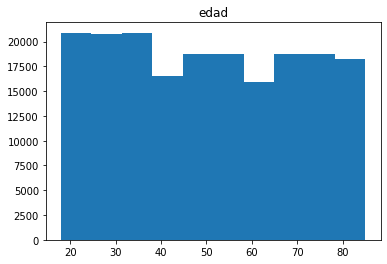

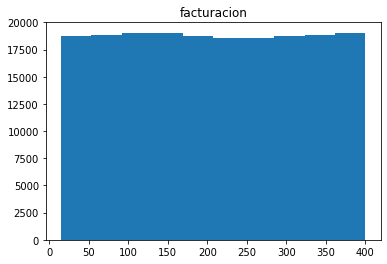

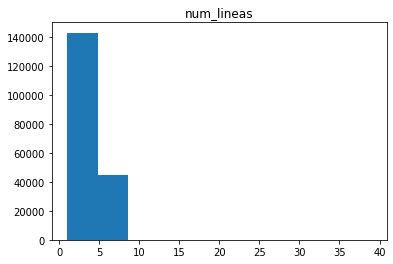

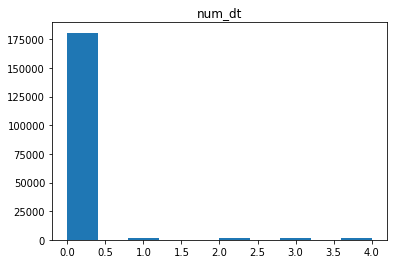

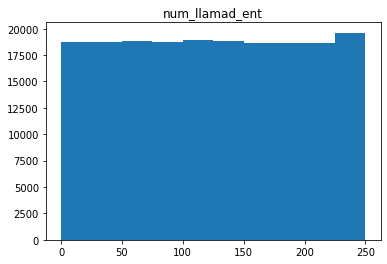

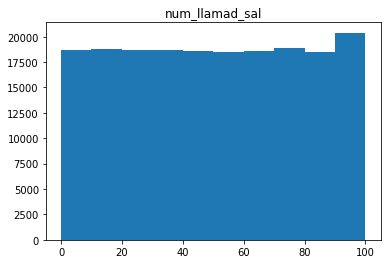

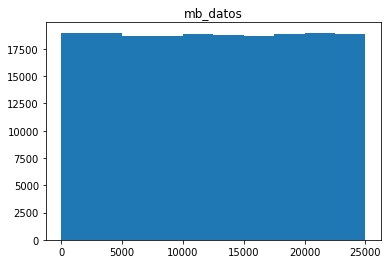

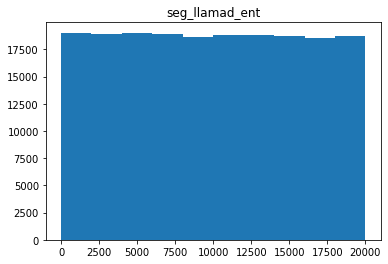

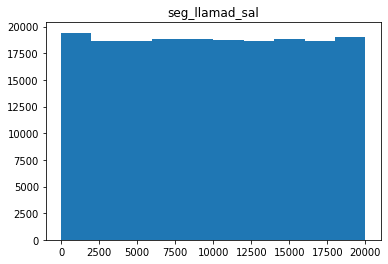

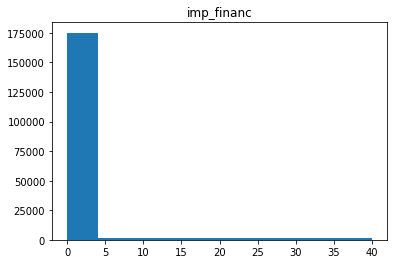

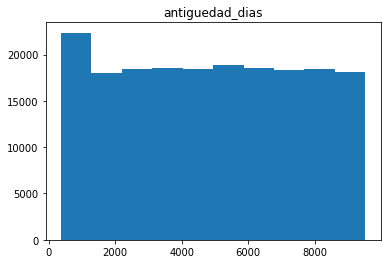

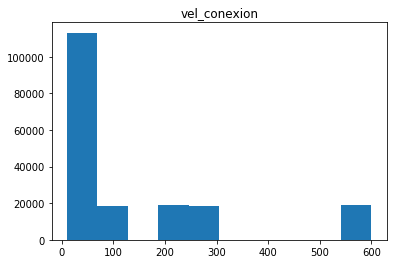

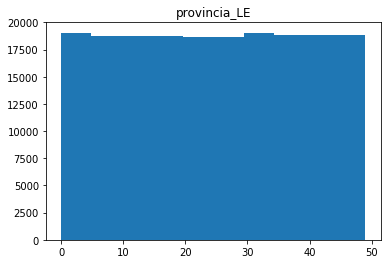

In [84]:
lista_numericas = ['edad','facturacion','num_lineas','num_dt','num_llamad_ent','num_llamad_sal','mb_datos','seg_llamad_ent',
                   'seg_llamad_sal','imp_financ','antiguedad_dias', 'vel_conexion','provincia_LE']

for var in lista_numericas:
    plt.hist(df_total[var])
    plt.title(var)
    plt.show()

In [85]:
# Transformar las binarias a numéricas

var_binarias = ['incidencia','conexion','financiacion','descuentos']
for var in var_binarias:
    df_total[var] = df_total[var].map({'NO':0, 'SI':1,'ADSL':0, 'FIBRA':1}).astype(int)
    
    
for var in var_binarias:
    print(df_total[var].value_counts())

0    182613
1      5565
Name: incidencia, dtype: int64
0    95221
1    92957
Name: conexion, dtype: int64
0    175140
1     13038
Name: financiacion, dtype: int64
0    148986
1     39192
Name: descuentos, dtype: int64


In [86]:
# Transformar las categoricas no binarias a dummies

dummies = pd.get_dummies(df_total['TV'], prefix='TV')
df_total = pd.concat([df_total, dummies], axis=1)

df_total.head()

,id,edad,facturacion,fecha_alta,antiguedad_dias,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,...,vel_conexion,TV,financiacion,imp_financ,descuentos,mes,provincia_LE,TV_tv-familiar,TV_tv-futbol,TV_tv-total
0,1,63,216.028109,2018-11-23,769,La Rioja,5,0.0,0,110,...,50,tv-futbol,0,0.0,0,diciembre,23,0,1,0
1,2,84,255.830842,2017-08-22,1227,Vizcaya,3,0.0,0,189,...,600,tv-futbol,0,0.0,1,diciembre,45,0,1,0
2,3,66,135.768153,2001-12-27,6944,Albacete,4,0.0,0,129,...,35,tv-futbol,0,0.0,1,diciembre,0,0,1,0
3,4,69,255.658527,2015-08-08,1972,Lugo,4,0.0,0,51,...,200,tv-familiar,0,0.0,0,diciembre,26,1,0,0
4,5,30,22.302845,1997-08-29,8525,Tarragona,2,2.0,0,183,...,10,tv-futbol,0,0.0,0,diciembre,40,0,1,0


In [87]:
df_total.columns

Index(['id', 'edad', 'facturacion', 'fecha_alta', 'antiguedad_dias',
       'provincia', 'num_lineas', 'num_dt', 'incidencia', 'num_llamad_ent',
       'num_llamad_sal', 'mb_datos', 'seg_llamad_ent', 'seg_llamad_sal',
       'conexion', 'vel_conexion', 'TV', 'financiacion', 'imp_financ',
       'descuentos', 'mes', 'provincia_LE', 'TV_tv-familiar', 'TV_tv-futbol',
       'TV_tv-total'],
      dtype='object')

In [88]:
# Num_dt

df_total['num_dt'].value_counts()

0.0    180835
4.0      1891
3.0      1822
1.0      1817
2.0      1813
Name: num_dt, dtype: int64

In [89]:
df_total['num_dt'] = df_total['num_dt'].astype(int)

In [90]:
df_total.head()

,id,edad,facturacion,fecha_alta,antiguedad_dias,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,...,vel_conexion,TV,financiacion,imp_financ,descuentos,mes,provincia_LE,TV_tv-familiar,TV_tv-futbol,TV_tv-total
0,1,63,216.028109,2018-11-23,769,La Rioja,5,0,0,110,...,50,tv-futbol,0,0.0,0,diciembre,23,0,1,0
1,2,84,255.830842,2017-08-22,1227,Vizcaya,3,0,0,189,...,600,tv-futbol,0,0.0,1,diciembre,45,0,1,0
2,3,66,135.768153,2001-12-27,6944,Albacete,4,0,0,129,...,35,tv-futbol,0,0.0,1,diciembre,0,0,1,0
3,4,69,255.658527,2015-08-08,1972,Lugo,4,0,0,51,...,200,tv-familiar,0,0.0,0,diciembre,26,1,0,0
4,5,30,22.302845,1997-08-29,8525,Tarragona,2,2,0,183,...,10,tv-futbol,0,0.0,0,diciembre,40,0,1,0


In [91]:
df_total.shape

(188178, 25)

### Detección de outliers

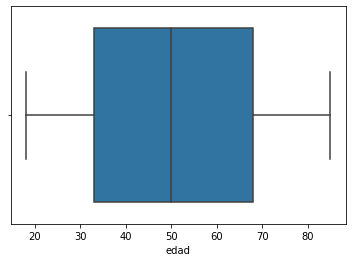

In [92]:
sns.boxplot(x=df_total['edad'])
plt.show()

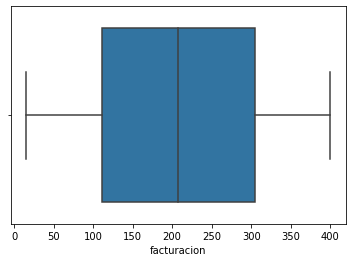

In [93]:
sns.boxplot(x=df_total['facturacion'])
plt.show()

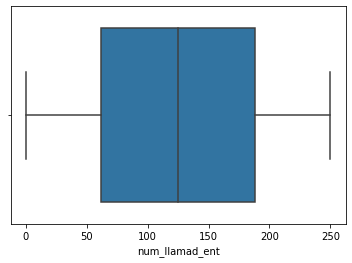

In [94]:
sns.boxplot(x=df_total['num_llamad_ent'])
plt.show()

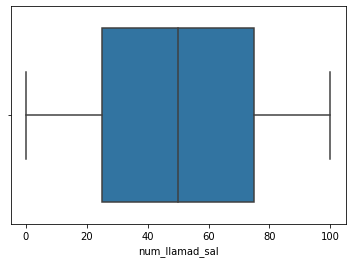

In [95]:
sns.boxplot(x=df_total['num_llamad_sal'])
plt.show()

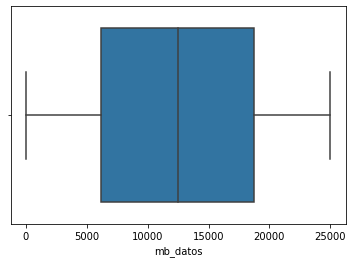

In [96]:
sns.boxplot(x=df_total['mb_datos'])
plt.show()

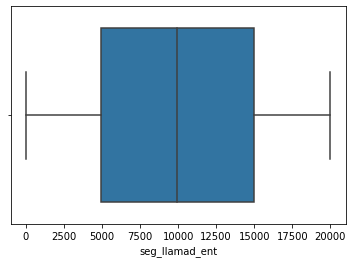

In [97]:
sns.boxplot(x=df_total['seg_llamad_ent'])
plt.show()

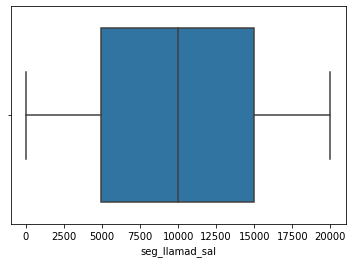

In [98]:
sns.boxplot(x=df_total['seg_llamad_sal'])
plt.show()

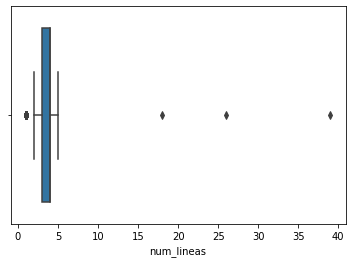

In [99]:
sns.boxplot(x=df_total['num_lineas'])
plt.show()

In [100]:
z = np.abs(stats.zscore(df_total['num_lineas']))
threshold = 3
print(np.where(z>3))

(array([ 2580,  8657, 36987], dtype=int64),)


In [101]:
# Se estudian los outliers de la variable num_lineas - comparar los datos de los clientes considerados outlier en 
# cuanto a número de líneas en diciembre y enero

df_total[df_total['num_lineas']>15]

,id,edad,facturacion,fecha_alta,antiguedad_dias,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,...,vel_conexion,TV,financiacion,imp_financ,descuentos,mes,provincia_LE,TV_tv-familiar,TV_tv-futbol,TV_tv-total
2580,2706,40,83.105391,2001-02-06,7268,Murcia,18,0,0,152,...,300,tv-futbol,0,0.0,0,diciembre,29,0,1,0
8657,9067,24,369.283452,2018-09-26,827,León,39,0,0,0,...,300,tv-total,0,0.0,1,diciembre,25,0,0,1
36987,38728,79,354.696978,2007-05-17,4977,Zaragoza,26,0,0,110,...,100,tv-futbol,0,0.0,1,diciembre,47,0,1,0


In [102]:
df_total[df_total.id.isin([2706,9067,38728])]

,id,edad,facturacion,fecha_alta,antiguedad_dias,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,...,vel_conexion,TV,financiacion,imp_financ,descuentos,mes,provincia_LE,TV_tv-familiar,TV_tv-futbol,TV_tv-total
2580,2706,40,83.105391,2001-02-06,7268,Murcia,18,0,0,152,...,300,tv-futbol,0,0.0,0,diciembre,29,0,1,0
8657,9067,24,369.283452,2018-09-26,827,León,39,0,0,0,...,300,tv-total,0,0.0,1,diciembre,25,0,0,1
36987,38728,79,354.696978,2007-05-17,4977,Zaragoza,26,0,0,110,...,100,tv-futbol,0,0.0,1,diciembre,47,0,1,0
97974,2706,40,83.105391,2001-02-06,7299,Murcia,4,0,0,149,...,300,tv-futbol,0,0.0,0,enero,29,0,1,0
103838,9067,24,369.283452,2018-09-26,858,León,4,0,0,214,...,300,tv-total,0,0.0,1,enero,25,0,0,1
131400,38728,79,354.696978,2007-05-17,5008,Zaragoza,4,0,0,181,...,100,tv-futbol,0,0.0,1,enero,47,0,1,0


In [103]:
df_total['num_lineas'] = df_total.apply(
    lambda x:4 if (x['num_lineas']>15) 
    else x['num_lineas'],axis=1)

Analizando la información sobre el número de líneas para los clientes con más de 15 líneas, se observa que 3 clientes tuvieron 18,39 y 26 líneas en el mes de Diciembre. Al comparar el número de líneas contratadas por los mismos clientes en el mes de enero, se observa que los 3 clientes han tenido un número de 4 líneas contratadas. En consecuencia, se opta por corregir el número de líneas en diciembre con el mismo número de líneas contratadas en enero, que son 4.
__________________

### Separar el dataset total en Diciembre y Enero


Una vez finalizado el preprocesado de los datos, se separan los datasets de Diciembre y Enero en 2 conjuntos distintos. Es una  paso previo a la realización de muestreo de los datos, ya que el muestreo de datos se realiza solo con el dataset de Diciembre, en el que se conoce la variable target, el *churn*.

In [104]:
df_total['mes'].value_counts()

diciembre    95467
enero        92711
Name: mes, dtype: int64

In [105]:
diciembre = df_total[df_total['mes']=='diciembre']
diciembre.shape

(95467, 25)

In [106]:
len(diciembre['id'].unique())

95467

In [107]:
enero = df_total[df_total['mes']=='enero'] 
enero.shape

(92711, 25)

In [108]:
len(enero['id'].unique())

92711

In [109]:
df_total.dtypes

id                   int64
edad                 int64
facturacion        float64
fecha_alta          object
antiguedad_dias      int32
provincia           object
num_lineas           int64
num_dt               int32
incidencia           int32
num_llamad_ent       int64
num_llamad_sal       int64
mb_datos             int64
seg_llamad_ent       int64
seg_llamad_sal       int64
conexion             int32
vel_conexion         int32
TV                  object
financiacion         int32
imp_financ         float64
descuentos           int32
mes                 object
provincia_LE         int32
TV_tv-familiar       uint8
TV_tv-futbol         uint8
TV_tv-total          uint8
dtype: object

### Muestreo de datos

Antes de realizar el muestreo de datos, se calcula el valor VIF para todas las variables para evitar situaciones de multicolinealidad.

Para realizar el muestro de datos, se añade la información *churn* para cada cliente en el conjunto de datos de Diciembre.

In [110]:
# Calcular el VIF de las variables

df_total_vif = df_total.copy(deep = True)
features = list(df_total_vif.columns)
features.remove('fecha_alta')
features.remove('provincia')
features.remove('TV')
features.remove('mes')
df_total_vif = df_total_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = df_total_vif[fet]
    y = df_total[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('El valor del VIF para la variable', var, 'es:', vif)

El valor del VIF para la variable id es: 1.0003819420049824
El valor del VIF para la variable edad es: 1.0069883974141365
El valor del VIF para la variable facturacion es: 1.739370715305188
El valor del VIF para la variable antiguedad_dias es: 1.0001416166875032
El valor del VIF para la variable num_lineas es: 1.3160648560322654
El valor del VIF para la variable num_dt es: 1.0103403080996933
El valor del VIF para la variable incidencia es: 1.0097328877485345
El valor del VIF para la variable num_llamad_ent es: 1.0000828413593605
El valor del VIF para la variable num_llamad_sal es: 1.000169155506153
El valor del VIF para la variable mb_datos es: 1.0001096994324068
El valor del VIF para la variable seg_llamad_ent es: 1.0001535731024498
El valor del VIF para la variable seg_llamad_sal es: 1.0002327187852014
El valor del VIF para la variable conexion es: 1.6697964391033977
El valor del VIF para la variable vel_conexion es: 1.6690844580097266
El valor del VIF para la variable financiacion e

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


El valor del VIF para la variable TV_tv-futbol es: inf
El valor del VIF para la variable TV_tv-total es: inf


Se puede observar que las variables *vel_conexion* y *imp_financ* tiene un valor VIF superior a 5. Se elimina una de ella, y se vuelve a comprobar el nivel de multicolinealidad del conjunto de datos.

In [111]:
df_total_vif.columns

Index(['id', 'edad', 'facturacion', 'antiguedad_dias', 'num_lineas', 'num_dt',
       'incidencia', 'num_llamad_ent', 'num_llamad_sal', 'mb_datos',
       'seg_llamad_ent', 'seg_llamad_sal', 'conexion', 'vel_conexion',
       'financiacion', 'imp_financ', 'descuentos', 'provincia_LE',
       'TV_tv-familiar', 'TV_tv-futbol', 'TV_tv-total'],
      dtype='object')

In [112]:
df_total_vif.shape

(188178, 21)

In [113]:
eliminar = ['fecha_alta','provincia','TV','mes','TV_tv-familiar','imp_financ']
for var in eliminar:
    diciembre.drop(var, axis=1, inplace=True)
    enero.drop(var, axis=1, inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [114]:
# Calcular el VIF de las variables

df_total_vif = df_total.copy(deep = True)
features = list(df_total_vif.columns)
features.remove('fecha_alta')
features.remove('provincia')
features.remove('TV')
features.remove('mes')
df_total_vif = df_total_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = df_total_vif[fet]
    y = df_total[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('El valor del VIF para la variable', var, 'es:', vif)

El valor del VIF para la variable id es: 1.0003819420049824
El valor del VIF para la variable edad es: 1.0069883974141365
El valor del VIF para la variable facturacion es: 1.739370715305188
El valor del VIF para la variable antiguedad_dias es: 1.0001416166875032
El valor del VIF para la variable num_lineas es: 1.3160648560322654
El valor del VIF para la variable num_dt es: 1.0103403080996933
El valor del VIF para la variable incidencia es: 1.0097328877485345
El valor del VIF para la variable num_llamad_ent es: 1.0000828413593605
El valor del VIF para la variable num_llamad_sal es: 1.000169155506153
El valor del VIF para la variable mb_datos es: 1.0001096994324068
El valor del VIF para la variable seg_llamad_ent es: 1.0001535731024498
El valor del VIF para la variable seg_llamad_sal es: 1.0002327187852014
El valor del VIF para la variable conexion es: 1.6697964391033977
El valor del VIF para la variable vel_conexion es: 1.6690844580097266
El valor del VIF para la variable financiacion e

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


El valor del VIF para la variable TV_tv-familiar es: inf
El valor del VIF para la variable TV_tv-futbol es: inf
El valor del VIF para la variable TV_tv-total es: inf


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


In [115]:
diciembre.set_index('id', inplace=True)
enero.set_index('id', inplace=True)
dic_y.set_index('id', inplace=True)    # la variable target

In [116]:
diciembre_total = pd.merge(diciembre, dic_y, on='id')       # el dataset con la variable target
diciembre_total.head()

,edad,facturacion,antiguedad_dias,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,financiacion,descuentos,provincia_LE,TV_tv-futbol,TV_tv-total,churn
id,,,,,,,,,,,,,,,,,,,
1,63,216.028109,769,5,0,0,110,79,10897,12806,13751,1,50,0,0,23,1,0,0
2,84,255.830842,1227,3,0,0,189,89,18657,6499,10862,1,600,0,1,45,1,0,0
3,66,135.768153,6944,4,0,0,129,30,15511,17013,16743,0,35,0,1,0,1,0,0
4,69,255.658527,1972,4,0,0,51,52,12670,3393,6771,1,200,0,0,26,0,0,0
5,30,22.302845,8525,2,2,0,183,3,23756,18436,4485,0,10,0,0,40,1,0,1


In [117]:
X_train, X_test, y_train, y_test = train_test_split (diciembre, 
                                                     dic_y,
                                                     test_size = 0.3,
                                                     random_state = 19,
                                                     stratify = dic_y)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

print('\nTRAIN - % de clientes churn=1: ', round(((y_train[y_train==1].sum() / y_train.shape[0])*100),2))
print('TEST  - % de clientes churn=1: ', round(((y_test[y_test==1].sum() / y_test.shape[0])*100),2))

Train set: (66826, 18) (66826, 1)
Test set: (28641, 18) (28641, 1)

TRAIN - % de clientes churn=1:  churn    7.42
dtype: float64
TEST  - % de clientes churn=1:  churn    7.42
dtype: float64


In [118]:
df_train = pd.merge(X_train, y_train, on='id')

In [119]:
df_train.head()

,edad,facturacion,antiguedad_dias,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,financiacion,descuentos,provincia_LE,TV_tv-futbol,TV_tv-total,churn
id,,,,,,,,,,,,,,,,,,,
68045,70,92.959088,6023,3,0,0,55,29,8198,18704,7393,0,10,0,0,38,1,0,0
77101,83,154.294543,838,4,0,0,17,87,3025,6998,6552,1,200,0,0,46,1,0,0
79233,70,372.518603,3598,5,0,0,228,19,20983,5058,5903,0,20,0,1,40,1,0,0
12715,51,258.487350,1029,5,0,0,169,7,19490,13799,17177,0,20,0,0,39,1,0,0
26091,63,171.336359,6226,3,0,0,166,3,20208,11925,7734,1,200,0,0,1,1,0,0


____________________

##### Análisis del conjunto de train

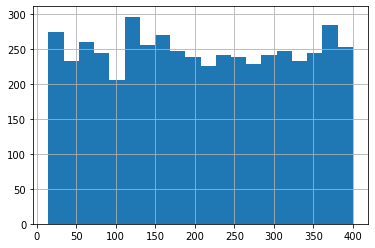

In [120]:
# Facturación de los clientes que se han ido de la compañía

df_train['facturacion'][df_train['churn']==1].hist(bins=20)
plt.show()

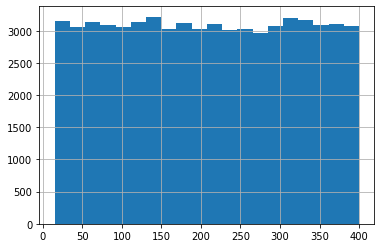

In [121]:
# Facturación de los clientes que no se han ido de la compañía

df_train['facturacion'][df_train['churn']==0].hist(bins=20)
plt.show()

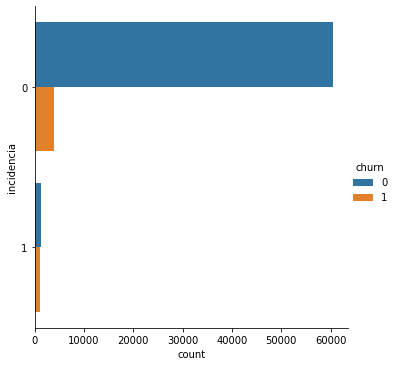

In [122]:
sns.catplot( y='incidencia', data=df_train, hue='churn', kind="count")
plt.show()

In [123]:
# Tabla de contingencias

pd.crosstab(index=df_train['churn'],
            columns=df_train['incidencia'], margins=True)

incidencia,0,1,All
churn,,,
0,60470,1397,61867
1,3855,1104,4959
All,64325,2501,66826


Se puede observar que de los clientes que se han ido de la compañía, la mayoría no han tenido ninguna incidencia. 

______________________________________________________

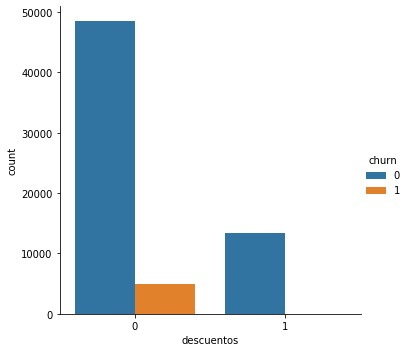

In [124]:
sns.catplot('descuentos',data=df_train,hue='churn',kind="count")
plt.show()

In [125]:
# Tabla de contingencias

pd.crosstab(index=df_train['churn'],
            columns=df_train['descuentos'], margins=True)

descuentos,0,1,All
churn,,,
0,48530,13337,61867
1,4957,2,4959
All,53487,13339,66826


Se puede observar que casi todos los clientes que se han ido de la compañía no tenían descuento. Y de los clientes con descuento solo 2 se ha ido de la compañia. 

___________________________________________________________________

In [126]:
df_train.head()

,edad,facturacion,antiguedad_dias,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,conexion,vel_conexion,financiacion,descuentos,provincia_LE,TV_tv-futbol,TV_tv-total,churn
id,,,,,,,,,,,,,,,,,,,
68045,70,92.959088,6023,3,0,0,55,29,8198,18704,7393,0,10,0,0,38,1,0,0
77101,83,154.294543,838,4,0,0,17,87,3025,6998,6552,1,200,0,0,46,1,0,0
79233,70,372.518603,3598,5,0,0,228,19,20983,5058,5903,0,20,0,1,40,1,0,0
12715,51,258.487350,1029,5,0,0,169,7,19490,13799,17177,0,20,0,0,39,1,0,0
26091,63,171.336359,6226,3,0,0,166,3,20208,11925,7734,1,200,0,0,1,1,0,0


In [127]:
lista_numericas.remove('imp_financ')
features = lista_numericas

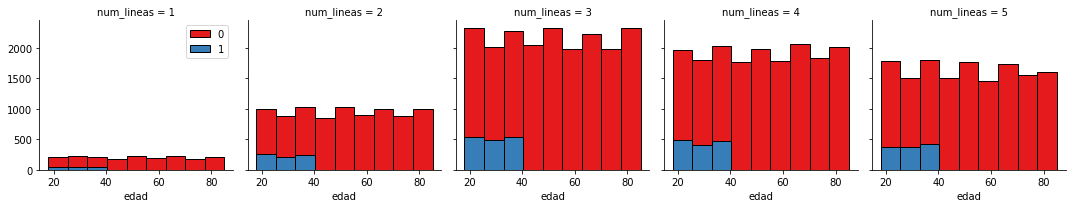

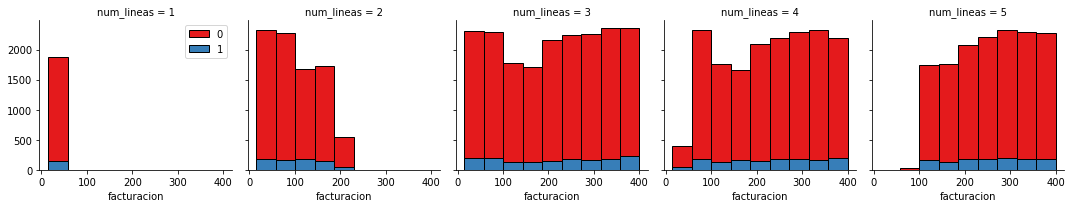

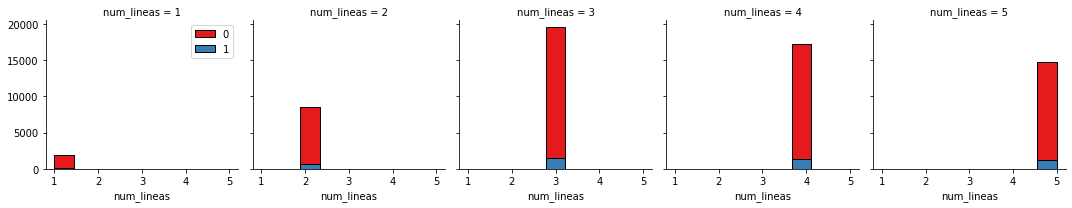

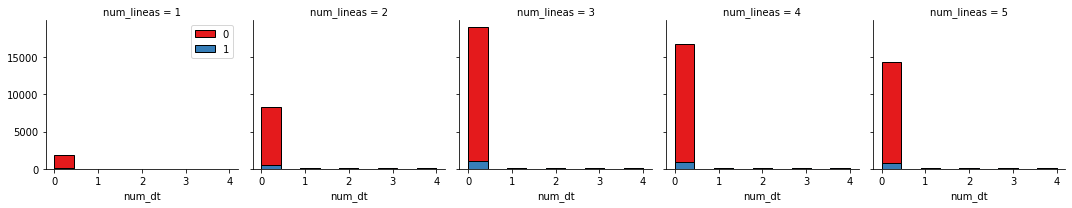

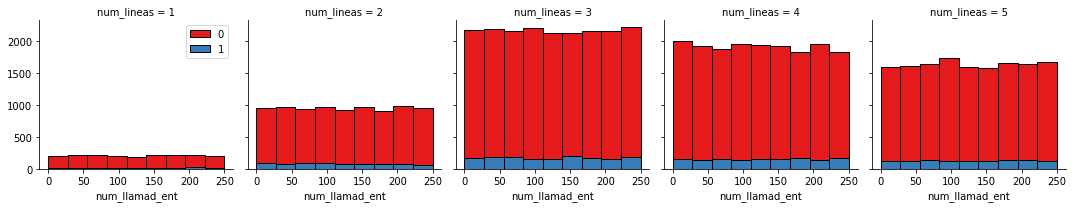

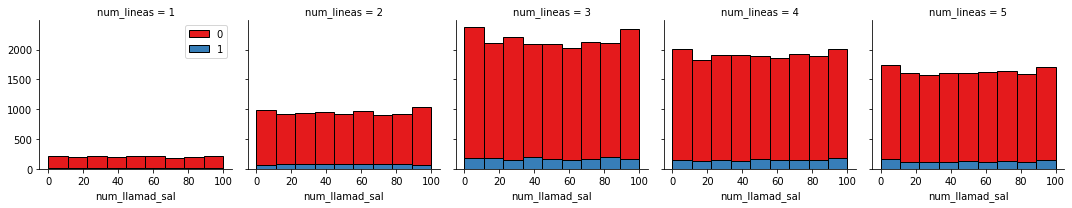

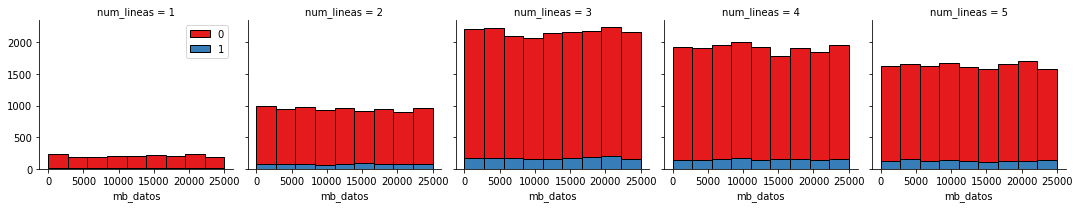

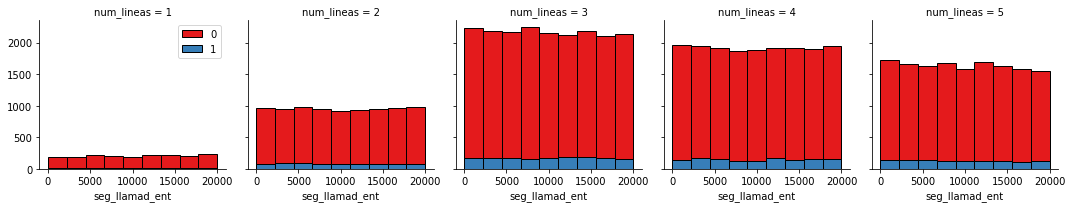

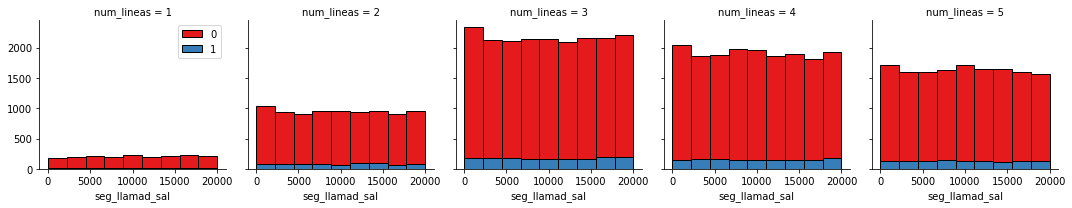

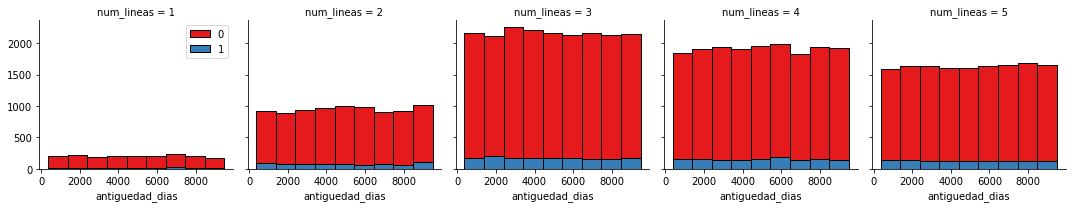

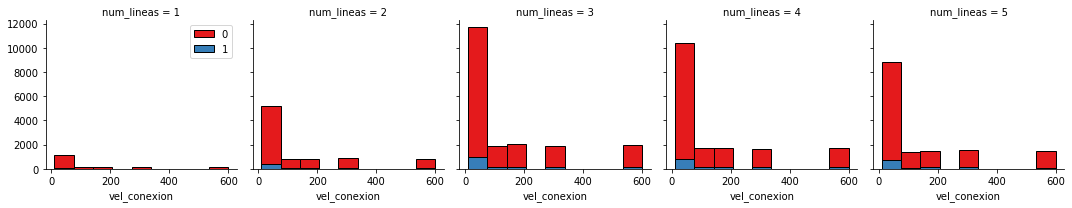

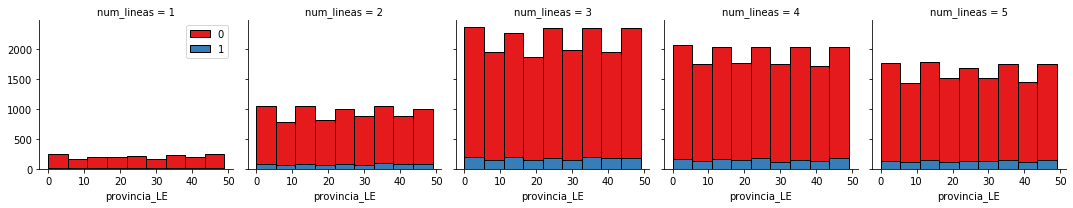

In [128]:
for i in features:
    bins = np.linspace(df_train[i].min(), df_train[i].max(), 10)
    g = sns.FacetGrid(df_train, col='num_lineas', hue='churn', palette='Set1', col_wrap=5)
    g.map(plt.hist, i , bins=bins, ec='k')

    g.axes[0].legend()
    plt.show()

**OBSERVACIONES**:

Se puede observar que los clientes que se han ido de la compañía son clientes con edad de hasta los 40 años, mayoritariamente con 2 o más líneas contratadas, con líneas en impago, mayoritariamente con una velocidad de conexión baja.

___________________

In [129]:
df_train.dtypes.head(25)

edad                 int64
facturacion        float64
antiguedad_dias      int32
num_lineas           int64
num_dt               int32
incidencia           int32
num_llamad_ent       int64
num_llamad_sal       int64
mb_datos             int64
seg_llamad_ent       int64
seg_llamad_sal       int64
conexion             int32
vel_conexion         int32
financiacion         int32
descuentos           int32
provincia_LE         int32
TV_tv-futbol         uint8
TV_tv-total          uint8
churn                int32
dtype: object

In [130]:
corr = abs(diciembre_total.corr())
corr[['churn']].sort_values(by = 'churn',ascending = False).style.background_gradient()

,churn
churn,1.000000
num_dt,0.312795
edad,0.296835
incidencia,0.277408
TV_tv-futbol,0.152493
descuentos,0.141447
TV_tv-total,0.111106
financiacion,0.074597
conexion,0.051478
provincia_LE,0.006305


### Modelos analíticos de clasificación para predecir cuando un cliente se fuga de la empresa

In [131]:
def saca_metricas(y1, y2):
    print('Matriz de confusión: ')
    print(confusion_matrix(y1, y2))
    print('\n Accuracy')
    print(accuracy_score(y1, y2))
    print('\n Precision')
    print(precision_score(y1, y2))
    print('\n Recall')
    print(recall_score(y1, y2))
    print('\n f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('\n AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)  

#### Regresión Logística

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matriz de confusión: 
[[26379   136]
 [ 1709   417]]

 Accuracy
0.935581858175343

 Precision
0.7540687160940326

 Recall
0.19614299153339604

 f1
0.3113101903695409

 AUC
0.5955069096833491


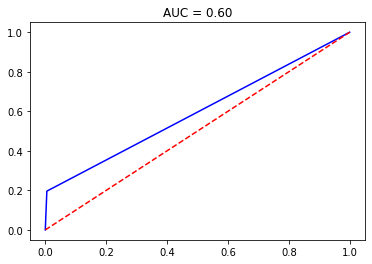

In [132]:
rl_classifier = LogisticRegression(solver ='liblinear', max_iter=300).fit(X_train, y_train)
y_pred     = rl_classifier.predict(X_test)
saca_metricas(y_test, y_pred)

#### Decisión Tree

Matriz de confusión: 
[[26192   323]
 [  978  1148]]

 Accuracy
0.9545756083935617

 Precision
0.7804214819850442

 Recall
0.5399811853245532

 f1
0.6383097025298861

 AUC
0.7638997007143226


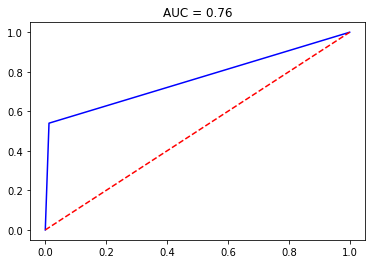

In [133]:
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=19).fit(X_train, y_train)
y_pred        = dt_classifier.predict(X_test)
saca_metricas(y_test, y_pred)

# Se ajusta la profundidad del árbol para evitar situaciones de overfitting

#### Random Forest

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Matriz de confusión: 
[[26378   137]
 [  880  1246]]

 Accuracy
0.9644914632868964

 Precision
0.900939985538684

 Recall
0.5860771401693321

 f1
0.7101738387004843

 AUC
0.7904551267507042


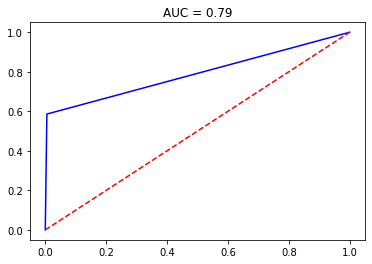

In [134]:
rf_classifier = RandomForestClassifier(random_state=19).fit(X_train, y_train)
y_pred        = rf_classifier.predict(X_test)
saca_metricas(y_test, y_pred)

_____________________

En los modelos anteriormente analizados se han incluido todas las variables presenten en el dataset de analisis (con sus transformaciones), con el objetivo de intentar captar la mayor aportacion de todas las variables en el procedo de predecir qué clientes se irá de la compañía. Los resultados iniciales obtenido en base a los anteriormente descritos modelos, son un punto de partida, a partir del cual se intentará mejorar y, si es el caso, reducir el número de variables utilizadas para predecir los clientes que se irán de la empresa.

Analizando los modelos realizados, se observa que:

- el modelo **Decision Tree** tiene una tasa de acierto general (los clientes que se van y los que no se van) de aproximadamente 96%. No obstante, tiene capacidad de predecir el aprox. 88% de los clientes que realmente se han ido de la compañía, así como un 53% de los clientes identificados como clientes que se han ido han sido correctos.

- el modelo de **Regresión Logística** tiene una capacidad de acierto general de 93.55%. Por un lado, de los clientes identificados como clientes que se han ido de la empresa, un total de aprox. 75% han sido correctos. No obstante, tiene una capacidad de predecir solo un 19% de los clientes que realmente se han ido de la compañía.

- el modelo **Random Forest** tiene una capacidad general de predicción de aprox. 96,44%. De los clientes identificados como clientes que se han ido de la compañía, más de 90% son correctos. Por otro lado, tiene capacidad de identificar correctamente aprox. 59% los clientes que realmente se han fugado de la compañía. 

Analizando los datos anteriormente expuestos, se observa que la capacidad predictiva general (verdadores positivos y verdaderos negativos) de los modelos es buena, por lo tanto los modelos son buenos en cuanto a la predicción, ya que se acerca a un porcentaje de acierto general de 80%. No obstante, a continuación se crearán nuevas variables con el objetivo de mejorar la capacidad predictiva de los modelos.

### Validación cruzada - comprobar el overfitting

In [135]:
results = cross_val_score(estimator=rf_classifier, X=X_train, y=y_train['churn'], cv=9)

In [136]:
results

array([0.96471856, 0.96309764, 0.96511785, 0.96579125, 0.96417508,
       0.96498316, 0.96444444, 0.96444444, 0.9626936 ])

In [137]:
print(results.mean())

0.9643851145745391


In [138]:
print(results.std())

0.0009160843537272937


La varianza muy baja indica que no hay overfitting en el modelo.

## Mejora modelos de clasificación

### Feature engineering

In [139]:
corr = abs(diciembre_total.corr())
corr[['churn']].sort_values(by = 'churn',ascending = False).style.background_gradient()

,churn
churn,1.000000
num_dt,0.312795
edad,0.296835
incidencia,0.277408
TV_tv-futbol,0.152493
descuentos,0.141447
TV_tv-total,0.111106
financiacion,0.074597
conexion,0.051478
provincia_LE,0.006305


In [140]:
def proporciones_final (var,target,df):

    proporcion = pd.DataFrame()
    
    proporcion['%depositos'] = df[target].groupby(df[var]).mean()*100
    proporcion['Conteo'] = df[target].groupby(df[var]).count()
    proporcion= proporcion.round(3)   
    proporcion_filtered = proporcion[(proporcion['%depositos']>0) & (proporcion['Conteo']>10)]
        
    if len(proporcion_filtered)<100 and len(proporcion_filtered)>1:
        fig = plt.figure()
        ax = proporcion_filtered['Conteo'].plot(kind='bar',grid=True)
                
        ax2 = ax.twinx()
        ax2.plot(proporcion_filtered['%depositos'].values, linestyle='-', linewidth=2.0,color='g')
        plt.tight_layout()
        plt.show()
    else:        
        proporcion_filtered.reset_index(inplace=True)
        sns.lmplot(x = var,y ='%depositos',data=proporcion_filtered, fit_reg=True,ci=None)   
        plt.show()

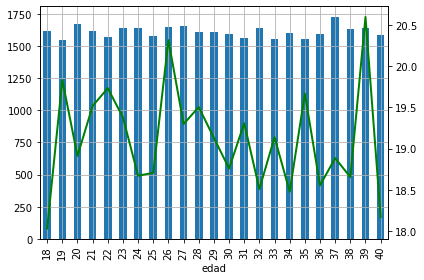

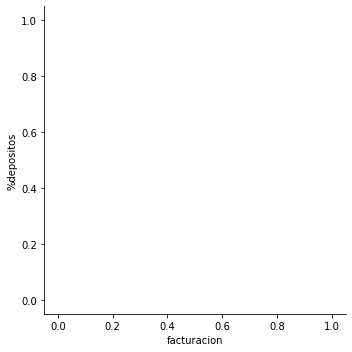

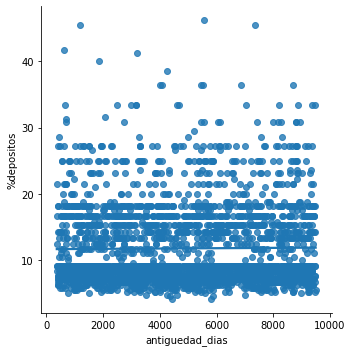

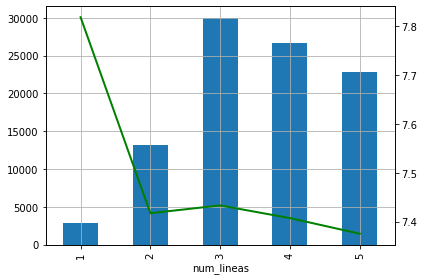

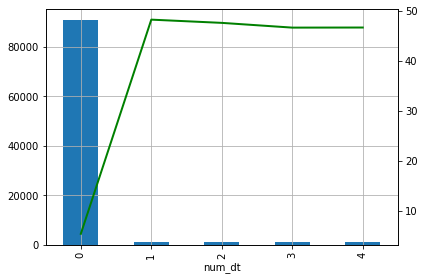

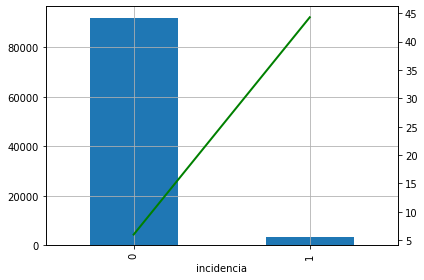

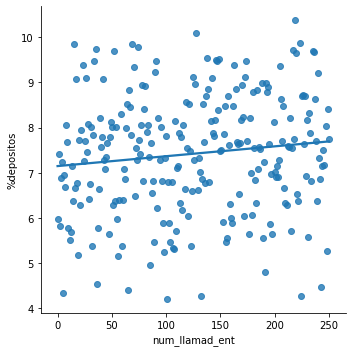

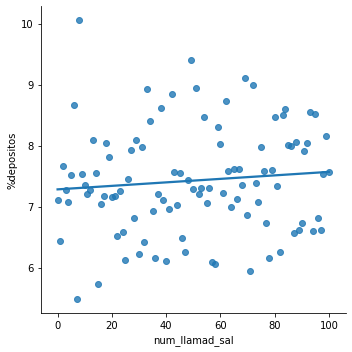

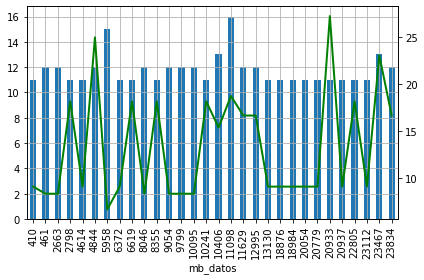

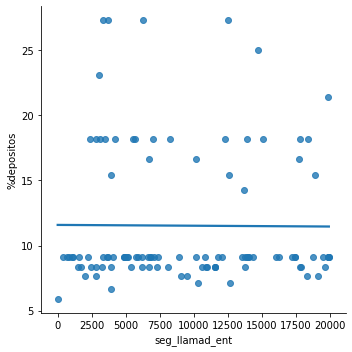

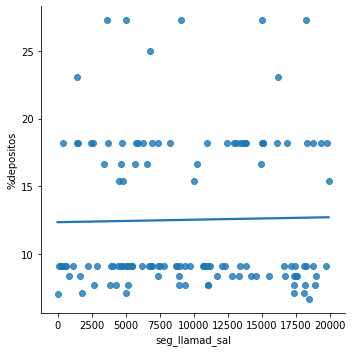

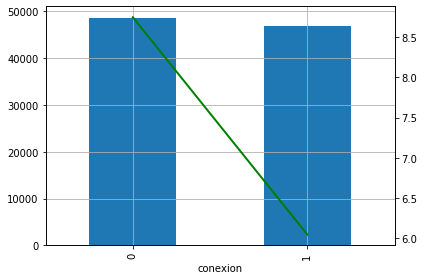

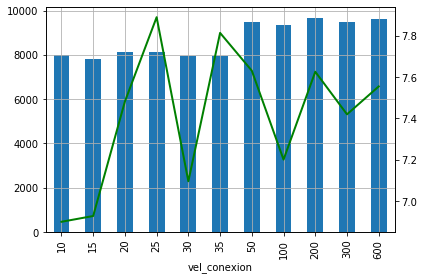

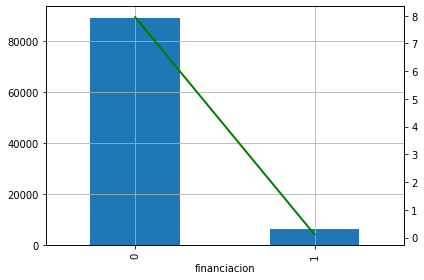

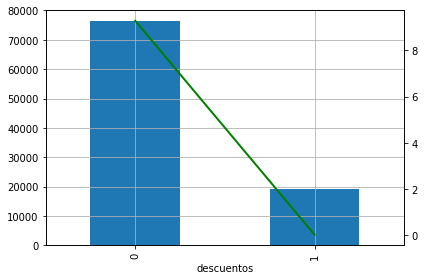

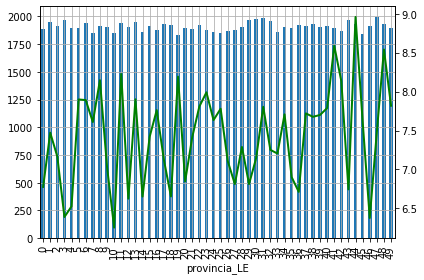

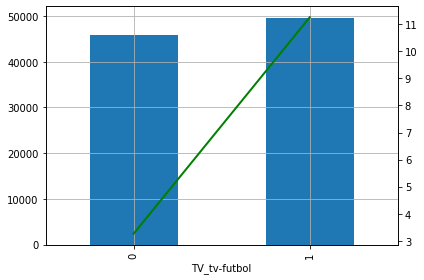

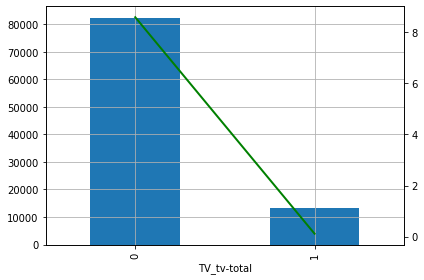

IndexError: invalid index to scalar variable.

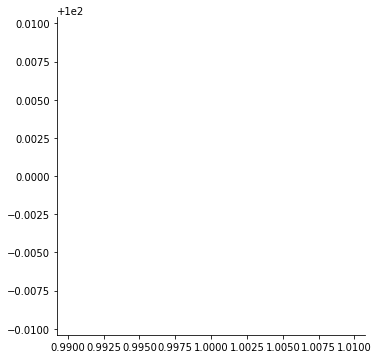

In [141]:
for i in diciembre_total.columns:
    proporciones_final (i,'churn', diciembre_total)

In [142]:
def tramos(varib,varib_destino,tamanio,maximo,df):
    df[varib_destino]=np.where(df[varib]==0,-1,(df[varib]//tamanio)*tamanio)
    df[varib_destino]=np.where(df[varib_destino]>=maximo,maximo,df[varib_destino])

#### Crear nuevas variables / tramificar para intentar mejorar el modelo de clasificación

In [143]:
# Edad TRAMOS de 10 años

tramos('edad','edad_tramos',10,80,diciembre_total)
diciembre_total['edad_tramos'].value_counts()

20    16230
30    16087
40    13211
60    13054
70    13052
50    13038
80     7638
10     3157
Name: edad_tramos, dtype: int64

In [144]:
# Edad 2 tramos: 1 - menor o igual a 40 años, 0 - mayor de 40 años

diciembre_total['edad_binaria'] = diciembre_total['edad'].apply(lambda x: 1 if x<=40 else 0)
diciembre_total['edad_binaria'].value_counts()

0    58408
1    37059
Name: edad_binaria, dtype: int64

In [145]:
# Edad diferentes tramos

diciembre_total['edad_gr1'] = diciembre_total['edad'].apply(lambda x: 1 if (x>=18 and x<19) or (x>=20 and x<22) or (x>=34 and x<35) else 0)
diciembre_total['edad_gr2'] = diciembre_total['edad'].apply(lambda x: 1 if (x>=19 and x<20) or (x>=22 and x<24) or (x>=35 and x<36) else 0)
diciembre_total['edad_gr3'] = diciembre_total['edad'].apply(lambda x: 1 if (x>=24 and x<25) else 0)
diciembre_total['edad_gr4'] = diciembre_total['edad'].apply(lambda x: 1 if (x>=25 and x<26) or (x>=38 and x<39) else 0)
diciembre_total['edad_gr5'] = diciembre_total['edad'].apply(lambda x: 1 if (x>=26 and x<30) or (x>=39 and x<=40) else 0)
diciembre_total['edad_gr6'] = diciembre_total['edad'].apply(lambda x: 1 if (x>=30 and x<31) or (x>=32 and x<33) else 0)
diciembre_total['edad_gr7'] = diciembre_total['edad'].apply(lambda x: 1 if (x>=31 and x<32) or (x>=33 and x<34) or (x>=36 and x<=37) else 0)


In [146]:
diciembre_total['edad_gr1'].value_counts()

0    88966
1     6501
Name: edad_gr1, dtype: int64

In [147]:
diciembre_total['edad_gr2'].value_counts()

0    89156
1     6311
Name: edad_gr2, dtype: int64

In [148]:
diciembre_total['edad_gr3'].value_counts()

0    93828
1     1639
Name: edad_gr3, dtype: int64

In [149]:
diciembre_total['edad_gr4'].value_counts()

0    92255
1     3212
Name: edad_gr4, dtype: int64

In [150]:
diciembre_total['edad_gr5'].value_counts()

0    85724
1     9743
Name: edad_gr5, dtype: int64

In [151]:
diciembre_total['edad_gr6'].value_counts()

0    92236
1     3231
Name: edad_gr6, dtype: int64

In [152]:
diciembre_total['edad_gr7'].value_counts()

0    89045
1     6422
Name: edad_gr7, dtype: int64

In [153]:
# Num_lineas

diciembre_total['num_lineas_binaria'] = diciembre_total['num_lineas'].apply(lambda x: 1 if x==1 else 0)

diciembre_total['num_lineas_gr1'] = diciembre_total['num_lineas'].apply(lambda x: 1 if x==1 else 0)
diciembre_total['num_lineas_gr2'] = diciembre_total['num_lineas'].apply(lambda x: 1 if x>=2 and x<=3 else 0)
diciembre_total['num_lineas_gr3'] = diciembre_total['num_lineas'].apply(lambda x: 1 if x>3 and x<=5 else 0) 

In [154]:
diciembre_total['num_lineas_binaria'].value_counts()

0    92615
1     2852
Name: num_lineas_binaria, dtype: int64

In [155]:
diciembre_total['num_lineas_gr1'].value_counts()

0    92615
1     2852
Name: num_lineas_gr1, dtype: int64

In [156]:
diciembre_total['num_lineas_gr2'].value_counts()

0    52268
1    43199
Name: num_lineas_gr2, dtype: int64

In [157]:
diciembre_total['num_lineas_gr3'].value_counts()

1    49416
0    46051
Name: num_lineas_gr3, dtype: int64

In [158]:
# Num_dt

diciembre_total['num_dt_binaria'] = diciembre_total['num_dt'].apply(lambda x: 1 if x>0 else 0) 
diciembre_total['num_dt_binaria'].value_counts()

0    90738
1     4729
Name: num_dt_binaria, dtype: int64

In [159]:
def tramos2(varib,varib_destino,tamanio,maximo,df):
    df[varib_destino]=np.where(df[varib]==0,0,(df[varib]//tamanio)*tamanio)
    df[varib_destino]=np.where(df[varib_destino]>=maximo,maximo,df[varib_destino])

In [160]:
# Num_llamad_ent

tramos2('num_llamad_ent','num_llamad_ent_tramos',50,250,diciembre_total)
diciembre_total['num_llamad_ent_tramos'].value_counts()

100    19145
0      19085
50     19035
200    18974
150    18828
250      400
Name: num_llamad_ent_tramos, dtype: int64

In [161]:
# Num_llamad_sal

tramos2('num_llamad_sal','num_llamad_sal_tramos',20,150,diciembre_total)
diciembre_total['num_llamad_sal_tramos'].value_counts()

60     19082
40     18948
0      18858
20     18842
80     18759
100      978
Name: num_llamad_sal_tramos, dtype: int64

In [162]:
# MB_datos

diciembre_total['mb_datos_gr1'] = diciembre_total['mb_datos'].apply(lambda x: 1 if x<2663 or (x>=9054 and x<10092) or 
                                                                    (x>=13130 and x<20779) else 0)
diciembre_total['mb_datos_gr2'] = diciembre_total['mb_datos'].apply(lambda x: 1 if (x>=2663 and x<2798) or (x>=5958 and x<6619) 
                                                                    or (x>=8046 and x<8355) or (x>=10095 and x<10241) or
                                                                    (x>=20937 and x<22805) else 0)
diciembre_total['mb_datos_gr3'] = diciembre_total['mb_datos'].apply(lambda x: 1 if (x>=2798 and x<4614) or (x>=6619 and x<8046) 
                                                                    or (x>=8355 and x<9054) or (x>=12995 and x<13130) or
                                                                    (x>=22805 and x<23112) else 0)
diciembre_total['mb_datos_gr4'] = diciembre_total['mb_datos'].apply(lambda x: 1 if (x>=4614 and x<4844) or 
                                                                    (x>=20779 and x<20933) or (x>=23112 and x<23467) else 0)
diciembre_total['mb_datos_gr5'] = diciembre_total['mb_datos'].apply(lambda x: 1 if (x>=4844 and x<5958) or (x>=20933 and x<20937) or 
                                                            (x>=23467 and x<23835) else 0)
diciembre_total['mb_datos_gr6'] = diciembre_total['mb_datos'].apply(lambda x: 1 if (x>=10241 and x<12995) else 0)

tramos2('mb_datos','mb_datos_tramos',5000,23850,diciembre_total)


In [163]:
diciembre_total['mb_datos_gr1'].value_counts()

0    52144
1    43323
Name: mb_datos_gr1, dtype: int64

In [164]:
diciembre_total['mb_datos_gr2'].value_counts()

0    83535
1    11932
Name: mb_datos_gr2, dtype: int64

In [165]:
diciembre_total['mb_datos_gr3'].value_counts()

0    78877
1    16590
Name: mb_datos_gr3, dtype: int64

In [166]:
diciembre_total['mb_datos_gr4'].value_counts()

0    92618
1     2849
Name: mb_datos_gr4, dtype: int64

In [167]:
diciembre_total['mb_datos_gr5'].value_counts()

0    89766
1     5701
Name: mb_datos_gr5, dtype: int64

In [168]:
diciembre_total['mb_datos_gr6'].value_counts()

0    84890
1    10577
Name: mb_datos_gr6, dtype: int64

In [169]:
diciembre_total['mb_datos_tramos'].value_counts()

0        19324
20000    19205
10000    19067
15000    18950
5000     18918
23850        3
Name: mb_datos_tramos, dtype: int64

In [170]:
tramos2('mb_datos','mb_datos_tramos',5000,23900,diciembre_total)

In [171]:
# vel_conexion

diciembre_total['vel_conexion_gr1'] = diciembre_total['vel_conexion'].apply(lambda x: 1 if (x>=10 and x<15) else 0)
diciembre_total['vel_conexion_gr2'] = diciembre_total['vel_conexion'].apply(lambda x: 1 if (x>=15 and x<25) or 
                                                                            (x>=30 and x<35) else 0)
diciembre_total['vel_conexion_gr3'] = diciembre_total['vel_conexion'].apply(lambda x: 1 if (x>=25 and x<30) or 
                                                                            (x>=35 and x<100) else 0)
diciembre_total['vel_conexion_gr4'] = diciembre_total['vel_conexion'].apply(lambda x: 1 if (x>=100 and x<200) else 0)
diciembre_total['vel_conexion_gr5'] = diciembre_total['vel_conexion'].apply(lambda x: 1 if (x>=200 and x<300) else 0)
diciembre_total['vel_conexion_gr6'] = diciembre_total['vel_conexion'].apply(lambda x: 1 if (x>=300 and x<600) else 0)

tramos('vel_conexion','vel_conexion_tramos',25,600,diciembre_total)

In [172]:
diciembre_total['vel_conexion_gr1'].value_counts()

0    87496
1     7971
Name: vel_conexion_gr1, dtype: int64

In [173]:
diciembre_total['vel_conexion_gr2'].value_counts()

0    71597
1    23870
Name: vel_conexion_gr2, dtype: int64

In [174]:
diciembre_total['vel_conexion_gr3'].value_counts()

0    69934
1    25533
Name: vel_conexion_gr3, dtype: int64

In [175]:
diciembre_total['vel_conexion_gr4'].value_counts()

0    86135
1     9332
Name: vel_conexion_gr4, dtype: int64

In [176]:
diciembre_total['vel_conexion_gr5'].value_counts()

0    85790
1     9677
Name: vel_conexion_gr5, dtype: int64

In [177]:
diciembre_total['vel_conexion_gr6'].value_counts()

0    86006
1     9461
Name: vel_conexion_gr6, dtype: int64

In [178]:
diciembre_total['vel_conexion_tramos'].value_counts()

25     24007
0      23893
200     9677
600     9623
50      9474
300     9461
100     9332
Name: vel_conexion_tramos, dtype: int64

In [179]:
# Seg_llamadas_ent y seg_llamad_sal


tramos2('seg_llamad_ent','seg_llamad_ent_tramos',5000,25000,diciembre_total)
tramos2('seg_llamad_sal','seg_llamad_sal_tramos',5000,25000,diciembre_total)

In [180]:
diciembre_total['seg_llamad_ent_tramos'].value_counts()

0        24102
5000     23999
10000    23748
15000    23612
20000        6
Name: seg_llamad_ent_tramos, dtype: int64

In [181]:
diciembre_total['seg_llamad_sal_tramos'].value_counts()

0        24282
5000     23810
10000    23710
15000    23660
20000        5
Name: seg_llamad_sal_tramos, dtype: int64

In [182]:
# Provincia

tramos2('provincia_LE','provincia_LE_tramos',5,60,diciembre_total)

In [183]:
diciembre_total['provincia_LE_tramos'].value_counts()

30    9684
0     9627
40    9583
35    9574
45    9567
10    9515
5     9511
15    9486
25    9475
20    9445
Name: provincia_LE_tramos, dtype: int64

In [184]:
corr = abs(diciembre_total.corr())
corr[['churn']].sort_values(by = 'churn',ascending = False).style.background_gradient()

,churn
churn,1.000000
edad_binaria,0.355449
num_dt_binaria,0.346618
num_dt,0.312795
edad,0.296835
edad_tramos,0.295605
incidencia,0.277408
edad_gr5,0.155498
TV_tv-futbol,0.152493
descuentos,0.141447


#### Comprobar la colinealidad entre las variables predictoras - VIF

In [185]:

diciembre_total_vif = diciembre_total.copy(deep = True)
features = list(diciembre_total_vif.columns)
features.remove('churn')
diciembre_total_vif = diciembre_total_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = diciembre_total_vif[fet]
    y = diciembre_total[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('El valor del VIF para la variable', var, 'es:', vif)

El valor del VIF para la variable edad es: 57.05892480520169
El valor del VIF para la variable facturacion es: 1.7615455243993976
El valor del VIF para la variable antiguedad_dias es: 1.000483393893746
El valor del VIF para la variable num_lineas es: 5.846926841465391
El valor del VIF para la variable num_dt es: 5.752825771881523
El valor del VIF para la variable incidencia es: 1.0187672781844592
El valor del VIF para la variable num_llamad_ent es: 24.995493781495757
El valor del VIF para la variable num_llamad_sal es: 25.12273897545277
El valor del VIF para la variable mb_datos es: 31.936232294960618
El valor del VIF para la variable seg_llamad_ent es: 15.957309641116197
El valor del VIF para la variable seg_llamad_sal es: 15.948469775338621
El valor del VIF para la variable conexion es: 8.679176432378846
El valor del VIF para la variable vel_conexion es: 5750.069198208252
El valor del VIF para la variable financiacion es: 1.0038193724174782
El valor del VIF para la variable descuento

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


El valor del VIF para la variable edad_binaria es: inf
El valor del VIF para la variable edad_gr1 es: inf


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


El valor del VIF para la variable edad_gr2 es: inf
El valor del VIF para la variable

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


 edad_gr3 es: inf
El valor del VIF para la variable edad_gr4 es: inf


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


El valor del VIF para la variable edad_gr5 es: inf


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


El valor del VIF para la variable edad_gr6 es: inf


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


El valor del VIF para la variable edad_gr7 es: inf
El valor del VIF para la variable num_lineas_binaria es: inf


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


El valor del VIF para la variable num_lineas_gr1 es: inf


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


El valor del VIF para la variable num_lineas_gr2 es: inf


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


El valor del VIF para la variable num_lineas_gr3 es: inf
El valor del VIF para la variable num_dt_binaria es: 5.775350227294677
El valor del VIF para la variable num_llamad_ent_tramos es: 24.992726212066177
El valor del VIF para la variable num_llamad_sal_tramos es: 25.113252178820368
El valor del VIF para la variable mb_datos_gr1 es: 7.012649330041279
El valor del VIF para la variable mb_datos_gr2 es: 3.740977698974159
El valor del VIF para la variable mb_datos_gr3 es: 4.981245112055076
El valor del VIF para la variable mb_datos_gr4 es: 1.6385497129048536
El valor del VIF para la variable mb_datos_gr5 es: 2.586083141390236
El valor del VIF para la variable mb_datos_gr6 es: 3.711037988694676
El valor del VIF para la variable mb_datos_tramos es: 32.021154495248254
El valor del VIF para la variable vel_conexion_gr1 es: 1623.8969750759406
El valor del VIF para la variable vel_conexion_gr2 es: 3803.9982096080457
El valor del VIF para la variable vel_conexion_gr3 es: 3878.9320751541854
El v

In [186]:
y_diciembre_total = diciembre_total['churn']

In [187]:
diciembre_total2 = diciembre_total.copy(deep=True)

In [188]:
borrar = ['edad','edad_tramos','edad_gr1','edad_gr2','edad_gr3','edad_gr4','edad_gr5','edad_gr6','edad_gr7',
          'num_dt','vel_conexion','vel_conexion_gr6','vel_conexion_tramos','num_llamad_ent_tramos','num_llamad_sal',
          'num_lineas_gr1','num_lineas_gr2','num_lineas_gr3','mb_datos','mb_datos_gr1','mb_datos_gr2','mb_datos_gr3',
         'mb_datos_gr4','mb_datos_gr5','mb_datos_gr6', 'provincia_LE_tramos', 'seg_llamad_sal','seg_llamad_ent','num_lineas']

for i in borrar:
    diciembre_total2.drop(i, axis=1, inplace=True)

In [189]:
diciembre_total_vif2 = diciembre_total2.copy(deep = True)
features = list(diciembre_total_vif2.columns)
features.remove('churn')
diciembre_total_vif2 = diciembre_total_vif2[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = diciembre_total_vif2[fet]
    y = diciembre_total2[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('El valor del VIF para la variable', var, 'es:', vif)

El valor del VIF para la variable facturacion es: 1.4259955803515447
El valor del VIF para la variable antiguedad_dias es: 1.00021121666978
El valor del VIF para la variable incidencia es: 1.0160492745773133
El valor del VIF para la variable num_llamad_ent es: 1.0003169994644427
El valor del VIF para la variable conexion es: 3.688485593165105
El valor del VIF para la variable financiacion es: 1.0034966641562264
El valor del VIF para la variable descuentos es: 1.007752711835941
El valor del VIF para la variable provincia_LE es: 1.0003405340001277
El valor del VIF para la variable TV_tv-futbol es: 1.2863559757377638
El valor del VIF para la variable TV_tv-total es: 1.602742288222939
El valor del VIF para la variable edad_binaria es: 1.0333992589574432
El valor del VIF para la variable num_lineas_binaria es: 1.0881558554202018
El valor del VIF para la variable num_dt_binaria es: 1.0213267838303843
El valor del VIF para la variable num_llamad_sal_tramos es: 1.0005155107693802
El valor del 

Se observa que todas las variables tienen el VIF menor de 5, lo que indica que no hay problemas de colinealidad entre las variables predictoras.

________________________

In [190]:
diciembre_total2.drop('churn', axis=1, inplace=True)

In [191]:
X_train, X_test, y_train, y_test = train_test_split(diciembre_total2,
                                                    y_diciembre_total,
                                                    test_size=0.3,
                                                    random_state=19,
                                                    stratify = y_diciembre_total)

### Buscar los mejores hiperparámetros por validación cruzada - GridSearchCV

Se intenta buscar los mejores hiperparámetros a usar para lanzar el modelo de clasificación. Se especifican varios parámetros a evaluar (*n_estimators*, *max_depth*, *criterio*), para obtener la combinación óptima de los parámetros del mejor modelo en cuanto a accuracy.

In [192]:
param_grid = {'n_estimators': [30, 50, 100, 150, 300],
              #'max_features': [5, 7, 9],
              'max_depth'   : [None, 5, 7, 10],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']
             }


# Búsqueda por grid search con validación cruzada

model_grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 19),
        param_grid = param_grid,
        scoring    = 'accuracy',  #'roc_auc',
        n_jobs     = -1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=19), 
    )


In [193]:
model_grid

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=19),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_we...ction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_sc

In [195]:
model_grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=19),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_we...ction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_sc

In [196]:
print('Los mejores hiperparámetros: \n', model_grid.best_params_)

Los mejores hiperparámetros: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'n_estimators': 300}


In [197]:
print('El mejor score: \n', model_grid.best_score_)

El mejor score: 
 0.9631430888076551


In [199]:
# Guardar el modelo como objetos Python

pkl_filename1 = "modelo_GridSearchCV.pkl"
with open(pkl_filename1, 'wb') as file:
    pickle.dump(model_grid, file)

In [200]:
# Carga el fichero anteriormente creado

with open(pkl_filename1, 'rb') as file:
    pickle_model = pickle.load(file)

In [201]:
# Calculate the accuracy score

score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))

Test score: 96.35 %


### Importancia de las variables predictoras - Selección de variables

Se utiliza un RandomForest para averiguar la importancia de las variables, utilizando los hiperparámetros obtenidos con GridSearchCV.

In [202]:
rf_importancia = RandomForestClassifier(criterion='entropy', n_estimators = 300).fit(X_train, y_train)

In [205]:
rf_importancia.feature_importances_.shape

(22,)

In [290]:
importancia_predictores = pd.DataFrame(
                            {'variable_predictora': X_train.columns,
                             'importancia': rf_importancia.feature_importances_}
                            )

print("\n Importancia de las variables predictoras en el modelo ")
print("_________________________________________________________")

importancia_predictores.sort_values('importancia', ascending=False)


 Importancia de las variables predictoras en el modelo 
_________________________________________________________


,variable_predictora,importancia
10,edad_binaria,0.243144
12,num_dt_binaria,0.112535
0,facturacion,0.078771
2,incidencia,0.076794
1,antiguedad_dias,0.074367
3,num_llamad_ent,0.071175
6,descuentos,0.065917
7,provincia_LE,0.061520
8,TV_tv-futbol,0.034308
13,num_llamad_sal_tramos,0.029195


In [214]:
y_diciembre_total.shape

(95467,)

### Evaluar varios modelos para elegir el que mejor resultado devuelve en cuanto a las métricas evaluadas 

In [215]:
# eliminar = ['num_lineas_binaria', 'vel_conexion_gr1', 'vel_conexion_gr2', 'vel_conexion_gr3', 'vel_conexion_gr4',
#                       'vel_conexion_gr5', 'conexion']
# for var in eliminar:
#     diciembre_total3.drop(var, axis=1, inplace=True)

In [241]:
X_train, X_test, y_train, y_test = train_test_split(diciembre_total2,
                                                    y_diciembre_total,
                                                    test_size=0.3,
                                                    random_state=19,
                                                    stratify = y_diciembre_total)

In [246]:
# Listado con los modelos a evaluar
def get_models():
    models=dict()
    models['Reg_log'] = LogisticRegression(solver='newton-cg')
    models['Dec_Tree'] = DecisionTreeClassifier(max_depth=5)
    models['Rand_Forest'] = RandomForestClassifier(n_estimators=300,criterion='entropy')
    models['XGBoost'] = XGBClassifier(n_jobs=-1,n_estimators=300)
    return models
    
    
    
# Evaluar los modelos usando la Validación cruzada
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores_cv = cross_val_score(model, X, y, scoring= 'roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    return scores_cv




In [247]:
# Lista con los modelos a evaluar
models = get_models()

# Evaluar los modelos y guardar los resultados (score, media y desviación típica)
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    

>Reg_log 0.964 (0.003)
>Dec_Tree 0.957 (0.003)
>Rand_Forest 0.963 (0.003)
>XGBoost 0.961 (0.003)


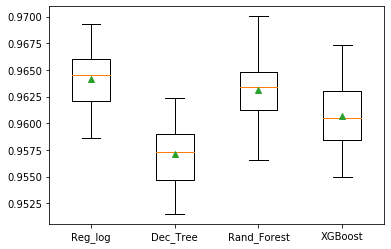

In [249]:
# Visualizar graficamente los modelos evaluados - BOXPLOT
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Se puede observar que todos los modelos evaluados tiene una muy buena capacidad predictiva, ya que tienen la capacidad predictiva de más de 95% en identificar correctamente el tipo de cliente - los clientes que son más propensos a fugarse de la empresa, así como los que no. 

In [250]:
rf_classifier_final = models['Rand_Forest'].fit(X_train, y_train)

In [251]:
y_pred = rf_classifier_final.predict(X_test)

Matriz de confusión: 
[[26378   137]
 [  904  1222]]

 Accuracy
0.9636535037184456

 Precision
0.8991905813097866

 Recall
0.5747883349012229

 f1
0.7012912482065997

 AUC
0.7848107241166495


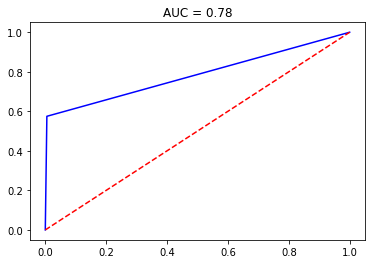

In [252]:
saca_metricas(y_test, y_pred)

In [253]:
# Guardar el modelo como objetos Python

pkl_filename = "modelo_final_RF.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_classifier_final, file)

In [254]:
# Carga el fichero anteriormente creado
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [255]:
# Calcular el accuracy 

score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))

Test score: 96.37 %


### Predecir los clientes de la cosecha de enero que más probabilidad tienen de cambiarse de operadora

Antes de realizar la predicción e identificar los clientes con más probabilidad de fuga de la empresa, se realizan todas las transformaciones y se crean todas las nuevas variables que se han tenido en cuenta para el dataset de diciembre.

In [256]:
diciembre_total2.shape

(95467, 22)

In [257]:
X_train.shape

(66826, 22)

In [264]:
X_train.columns

Index(['facturacion', 'antiguedad_dias', 'incidencia', 'num_llamad_ent',
       'conexion', 'financiacion', 'descuentos', 'provincia_LE',
       'TV_tv-futbol', 'TV_tv-total', 'edad_binaria', 'num_lineas_binaria',
       'num_dt_binaria', 'num_llamad_sal_tramos', 'mb_datos_tramos',
       'vel_conexion_gr1', 'vel_conexion_gr2', 'vel_conexion_gr3',
       'vel_conexion_gr4', 'vel_conexion_gr5', 'seg_llamad_ent_tramos',
       'seg_llamad_sal_tramos'],
      dtype='object')

In [259]:
enero_total = enero.copy(deep=True)
enero_total.shape

(92711, 18)

In [263]:
enero_total.columns

Index(['edad', 'facturacion', 'antiguedad_dias', 'num_lineas', 'num_dt',
       'incidencia', 'num_llamad_ent', 'num_llamad_sal', 'mb_datos',
       'seg_llamad_ent', 'seg_llamad_sal', 'conexion', 'vel_conexion',
       'financiacion', 'descuentos', 'provincia_LE', 'TV_tv-futbol',
       'TV_tv-total'],
      dtype='object')

In [265]:
# Edad 2 tramos
enero_total['edad_binaria'] = enero_total['edad'].apply(lambda x: 1 if x<=40 else 0)
enero_total['edad_binaria'].value_counts()


# Num_dt
enero_total['num_dt_binaria'] = enero_total['num_dt'].apply(lambda x: 1 if x>0 else 0) 
enero_total['num_dt_binaria'].value_counts()

# vel_conexion
enero_total['vel_conexion_gr1'] = enero_total['vel_conexion'].apply(lambda x: 1 if (x>=10 and x<15) else 0)
enero_total['vel_conexion_gr2'] = enero_total['vel_conexion'].apply(lambda x: 1 if (x>=15 and x<25) or 
                                                                            (x>=30 and x<35) else 0)
enero_total['vel_conexion_gr3'] = enero_total['vel_conexion'].apply(lambda x: 1 if (x>=25 and x<30) or 
                                                                            (x>=35 and x<100) else 0)
enero_total['vel_conexion_gr4'] = enero_total['vel_conexion'].apply(lambda x: 1 if (x>=100 and x<200) else 0)
enero_total['vel_conexion_gr5'] = enero_total['vel_conexion'].apply(lambda x: 1 if (x>=200 and x<300) else 0)
enero_total['vel_conexion_gr6'] = enero_total['vel_conexion'].apply(lambda x: 1 if (x>=300 and x<600) else 0)

# Num_llamad_sal
tramos2('num_llamad_sal','num_llamad_sal_tramos',20,150, enero_total)
enero_total['num_llamad_sal_tramos'].value_counts()

# MB datos TRAMOS
tramos2('mb_datos','mb_datos_tramos',5000,23850,enero_total)
enero_total['mb_datos_tramos'].value_counts()


# Num_lineas
enero_total['num_lineas_binaria'] = enero_total['num_lineas'].apply(lambda x: 1 if x==1 else 0)


# Seg_llamadas_ent y seg_llamad_sal
tramos2('seg_llamad_ent','seg_llamad_ent_tramos',5000,25000,enero_total)
tramos2('seg_llamad_sal','seg_llamad_sal_tramos',5000,25000,enero_total)

In [276]:
enero_total.shape

(92711, 31)

In [278]:
enero_total1 = enero_total.copy(deep=True)
eliminar = ['edad','num_dt','num_lineas','num_llamad_sal','mb_datos','seg_llamad_ent', 'seg_llamad_sal','vel_conexion']
for var in eliminar:
    enero_total1.drop(var, axis=1, inplace=True)

enero_total1.shape

(92711, 23)

In [281]:
enero_total1.drop('vel_conexion_gr5', axis=1, inplace=True)

In [282]:
enero_total1.shape

(92711, 22)

In [284]:
modelo_probabilidad = pickle_model.predict_proba(enero_total1)[:,1]
modelo_probabilidad = (pd.DataFrame(modelo_probabilidad, columns=['probabilidad'],index=enero_total1.index))
modelo_probabilidad.sort_values(by=['probabilidad'],ascending=False,axis=0,inplace=True)

In [285]:
modelo_probabilidad.head()

,probabilidad
id,
13713,0.960000
86641,0.960000
24152,0.960000
42380,0.960000
85460,0.956667


### Información sobre la marcha de los clientes de la compañía - las causas por las cuales los clientes se están fugando.

Con la ayuda de los modelos anteriormente analizados se puede concluir que los clientes más propensos en cambiar de operadora tienen las siguientes características:

- clientes de menos de 40 años
- que por lo general tienen líneas en impago
- clientes que han tenido incidencias
- así como clientes que no tienen descuentos
- con una velocidad de conexión baja (10-15 MB)
- que no tienen financianción
- con TV tipo TV_tv-futbol 
- con más de 1 línea de teléfono contratadas


Las principales causas de la marcha de clientes son:

- la falta de fidelización/descuentos, ofertas
- necesidad de mejora en cuanto a la atención al cliente, para disminuir la tasa de incidencias o una mejor gestión/más óptima de las incidencias (seguimiento, etc.)
- prestar especial atención a los clientes de menos de 40 años, con opciones de realizar distintas campañas de fidelización con nuevos productos/servicios más atractivos para esta población
- ofrecer soluciones para los clientes con líneas en impago, etc.



In [314]:
importancia_predictores.sort_values('importancia', ascending=False).head(10)

,variable_predictora,importancia
10,edad_binaria,0.243144
12,num_dt_binaria,0.112535
0,facturacion,0.078771
2,incidencia,0.076794
1,antiguedad_dias,0.074367
3,num_llamad_ent,0.071175
6,descuentos,0.065917
7,provincia_LE,0.061520
8,TV_tv-futbol,0.034308
13,num_llamad_sal_tramos,0.029195


In [296]:
diciembre_total300 = pd.merge(diciembre_total2, y_diciembre_total, on='id')

In [316]:
features = diciembre_total300.columns

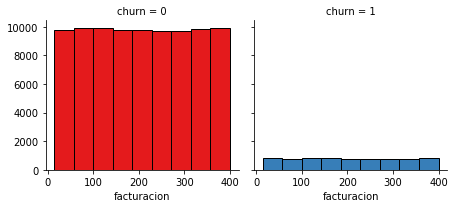

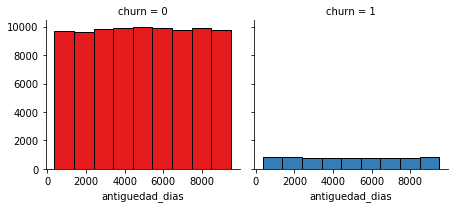

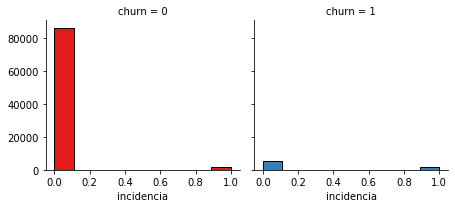

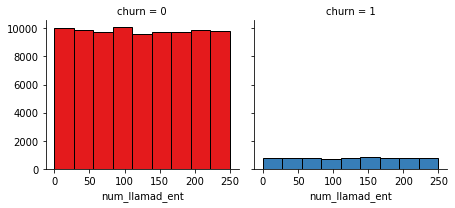

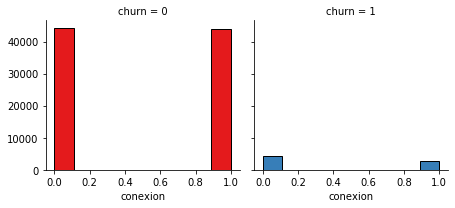

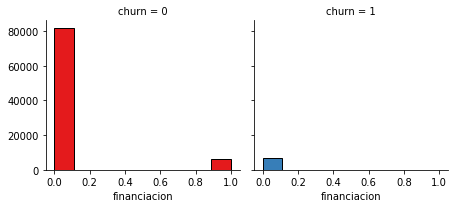

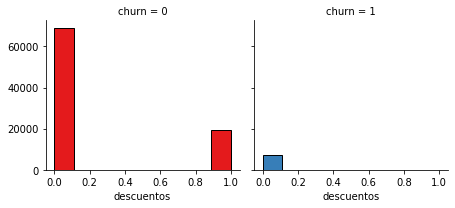

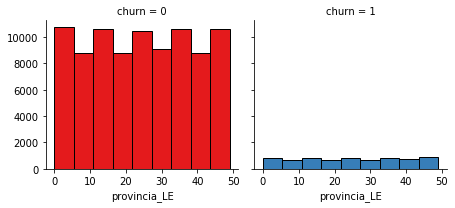

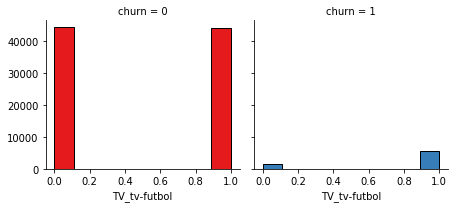

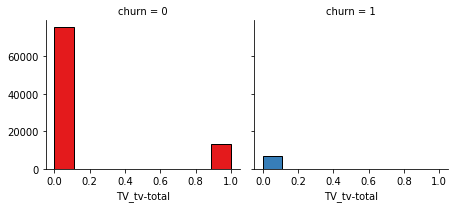

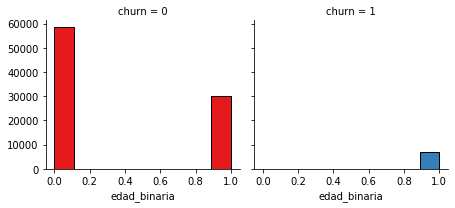

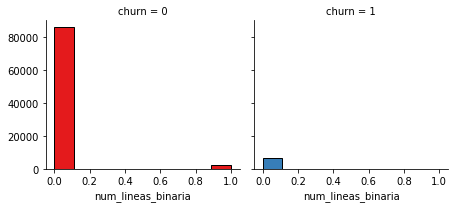

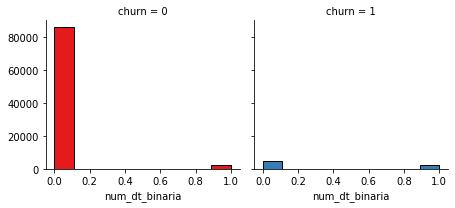

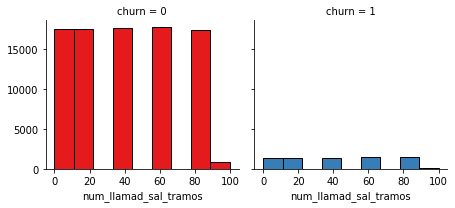

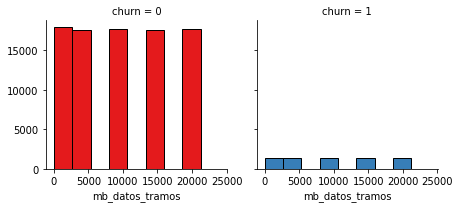

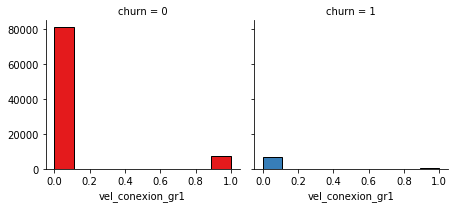

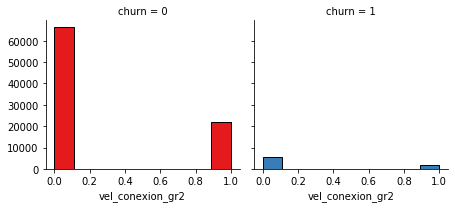

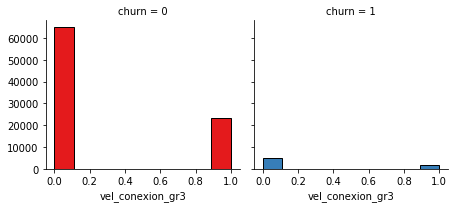

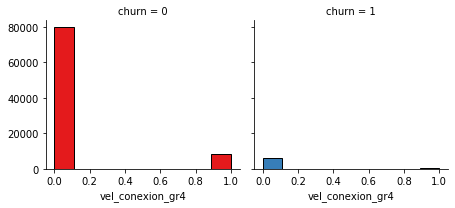

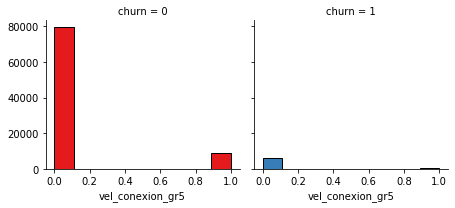

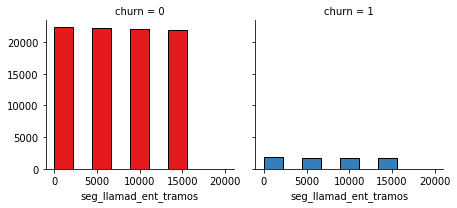

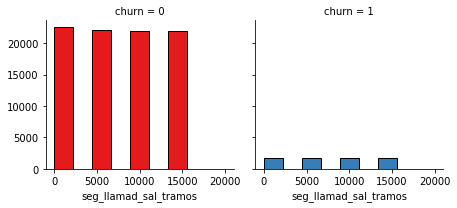

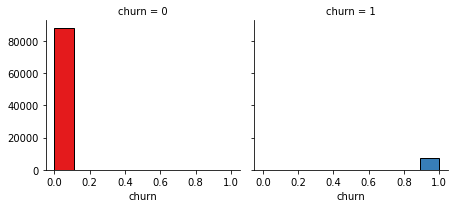

In [317]:
for i in features:
    bins = np.linspace(diciembre_total300[i].min(), diciembre_total300[i].max(), 10)
    g = sns.FacetGrid(diciembre_total300, col='churn', hue='churn', palette='Set1', col_wrap=6)
    g.map(plt.hist, i , bins=bins, ec='k')

    plt.show()